In [1]:
import rdkit

import pandas as pd
import numpy as np
from copy import deepcopy

from torch_geometric.datasets import MoleculeNet
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import AllChem

In [2]:
import custom_regression_functions
import custom_models
from custom_regression_functions import *
from custom_models import *
import custom_general_functions
from custom_general_functions import *

from copy import deepcopy

In [3]:
import dgl_functions
from dgl_functions import *
import dgl_models
from dgl_models import *

In [4]:
from custom_models_fingerprints import *

In [5]:
use_fingerprints = False

apply_scaffold_split = True

create_new_data = False

In [6]:
from torch_geometric.nn import global_mean_pool, global_max_pool

model_type = "DGL"


if not apply_scaffold_split:
    if not use_fingerprints:
        filename_basic = "results_dgl_regression_val/model_gnn_conv"
    else:
        filename_basic = "results_dgl_regression_val/model_gnn_conv"
else:
    if not use_fingerprints:
        filename_basic = "results_dgl_regression_scaffold_val/model_gnn_conv"
    else:
        filename_basic = "results_dgl_regression_scaffold_val/model_gnn_conv"

hidden_channels=[64]
gcn_layers=4
linear_sizes=[[512], [512, 256]]
aggregations=[global_mean_pool, global_max_pool]
apply_random_aggregations=False

learning_rate=0.001

In [7]:
param_combinations = dict()

hidden_channels_list = [[64], [256], [512]]
linear_sizes_list = [[], [512], [512, 256]]
gcn_layers_list = [1, 2, 3, 4]
aggregations_list = [[global_mean_pool, global_max_pool], [global_mean_pool], [global_max_pool]]
apply_scaffold_split_list = [apply_scaffold_split]

In [8]:
param_combinations["hidden_channels_list"] = hidden_channels_list
param_combinations["linear_sizes_list"] = linear_sizes_list

param_combinations["gcn_layers_list"] = gcn_layers_list
param_combinations["aggregations_list"] = aggregations_list
param_combinations["apply_scaffold_split_list"] = apply_scaffold_split_list

In [9]:
import itertools


keys = list(param_combinations.keys())
values = list(param_combinations.values())

combinations = list(itertools.product(*values))

In [10]:
batch_size = 64

In [11]:
print(len(combinations))

108


In [12]:
param_combinations = dict()

hidden_feats = [[64], [64, 64], [64, 64, 64], [64, 64, 64, 64], [128], [128, 128], [128, 128, 128], [128, 128, 128, 128], [256], [256, 256], [256, 256, 256], [256, 256, 256, 256], [512], [512, 512], [512, 512, 512], [512, 512, 512, 512]]

predictor_hidden_feats = [128, 256, 512, 1024]
keys = list(param_combinations.keys())
values = list(param_combinations.values())

combinations = list(itertools.product(*values))

In [13]:
param_combinations = dict()


param_combinations["hidden_feats"] = [[64], [64, 64], [64, 64, 64], [64, 64, 64, 64], [128], [128, 128], [128, 128, 128], [128, 128, 128, 128], [256], [256, 256], [256, 256, 256], [256, 256, 256, 256], [512], [512, 512], [512, 512, 512], [512, 512, 512, 512]]
param_combinations["predictor_hidden_feats"] = [128, 256, 512, 1024]
apply_scaffold_split_list = [apply_scaffold_split]
param_combinations["apply_scaffold_split_list"] = apply_scaffold_split_list

keys = list(param_combinations.keys())
values = list(param_combinations.values())

combinations = list(itertools.product(*values))

In [14]:
if create_new_data:
    data, data_y = load_esol()

    pytorch_graph_list = create_dgl_graph(data, data_y)

    processed_data = process_dgl_graph(pytorch_graph_list)

    train_dataset, test_dataset, val_dataset = create_train_test_graphs(processed_data, train_percentage= 0.8, test_percentage = 0.1, apply_scaffold_split = apply_scaffold_split )
    #loader, test_loader = create_dataloader(train_dataset, test_dataset, batch_size=batch_size)
    loader, test_loader, val_loader = create_dgl_dataloader_val(train_dataset, test_dataset, val_dataset, batch_size=batch_size)

else:

    import dill as pickle

    if apply_scaffold_split:
        loader_file = 'datasets_scaffold_reg_esol.pkl'
    else: 
        loader_file = 'datasets_reg_esol.pkl'
    with open(loader_file, 'rb') as file: 
        
        
        loaders = pickle.load(file) 
    
        print(loaders) 

    train_dataset, test_dataset, val_dataset = loaders

    train_dataset, test_dataset, val_dataset = create_dgl_sets(datasets=[train_dataset, test_dataset, val_dataset])

    '''
    if use_fingerprints:
        morgan_data_train, morgan_data_test, morgan_data_val = create_fingerprint_sets(datasets=[train_dataset, test_dataset, val_dataset], radius=radius, fpSize = fpSize, create_count_fp = create_count_fp)

        loader = DataLoader(morgan_data_train, 
                            batch_size=batch_size, shuffle=True)
        test_loader = DataLoader(morgan_data_test, 
                                batch_size=batch_size, shuffle=True)

    else:
    '''
        
    #loader, test_loader = create_dataloader(train_dataset, test_dataset, batch_size=batch_size)
    loader, test_loader, val_loader = create_dgl_dataloader_val(train_dataset, test_dataset, val_dataset, batch_size=batch_size)

[<dgl.data.utils.Subset object at 0x0000015CA2EC8CA0>, <dgl.data.utils.Subset object at 0x0000015CA3546D00>, <dgl.data.utils.Subset object at 0x0000015CA3546D60>]
There was a problem with 
C
 at index 248


In [15]:
len(loader)

15

In [16]:
len(train_dataset)

901

In [17]:
len(val_dataset)

113

run: 0
{'hidden_feats': [64], 'predictor_hidden_feats': 128, 'apply_scaffold_split_list': True}
GCNPredictor(
  (gnn): GCN(
    (gnn_layers): ModuleList(
      (0): GCNLayer(
        (graph_conv): GraphConv(in=74, out=64, normalization=none, activation=<function relu at 0x0000015C98418DC0>)
        (dropout): Dropout(p=0.0, inplace=False)
        (res_connection): Linear(in_features=74, out_features=64, bias=True)
        (bn_layer): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
    )
  )
  (readout): WeightedSumAndMax(
    (weight_and_sum): WeightAndSum(
      (atom_weighting): Sequential(
        (0): Linear(in_features=64, out_features=1, bias=True)
        (1): Sigmoid()
      )
    )
  )
  (predict): MLPPredictor(
    (predict): Sequential(
      (0): Dropout(p=0.0, inplace=False)
      (1): Linear(in_features=128, out_features=128, bias=True)
      (2): ReLU()
      (3): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running

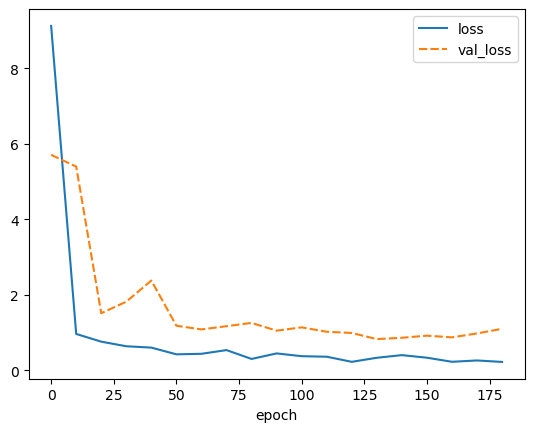

best weights loaded


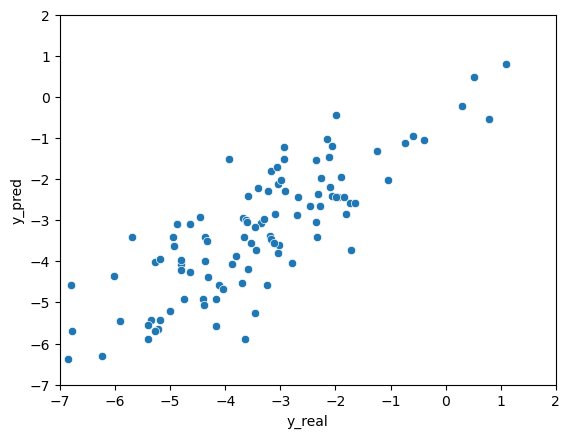

elapsed time: 54.7974739074707
run: 1
{'hidden_feats': [64], 'predictor_hidden_feats': 256, 'apply_scaffold_split_list': True}
GCNPredictor(
  (gnn): GCN(
    (gnn_layers): ModuleList(
      (0): GCNLayer(
        (graph_conv): GraphConv(in=74, out=64, normalization=none, activation=<function relu at 0x0000015C98418DC0>)
        (dropout): Dropout(p=0.0, inplace=False)
        (res_connection): Linear(in_features=74, out_features=64, bias=True)
        (bn_layer): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
    )
  )
  (readout): WeightedSumAndMax(
    (weight_and_sum): WeightAndSum(
      (atom_weighting): Sequential(
        (0): Linear(in_features=64, out_features=1, bias=True)
        (1): Sigmoid()
      )
    )
  )
  (predict): MLPPredictor(
    (predict): Sequential(
      (0): Dropout(p=0.0, inplace=False)
      (1): Linear(in_features=128, out_features=256, bias=True)
      (2): ReLU()
      (3): BatchNorm1d(256, eps=1e-05, momentum=

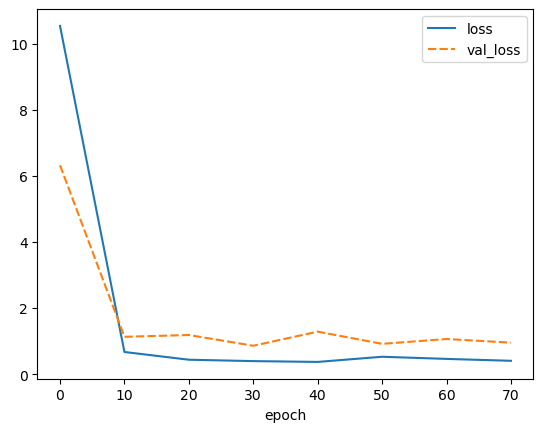

best weights loaded


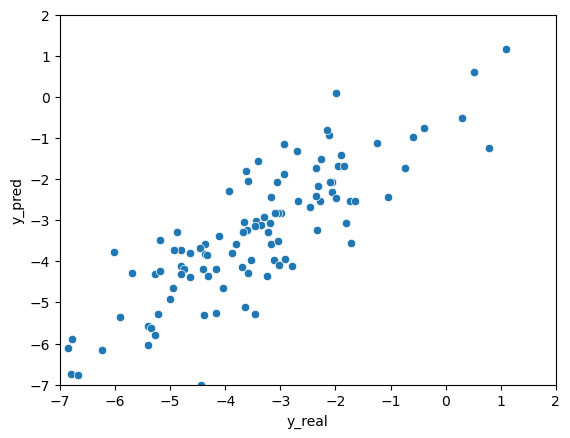

elapsed time: 19.852107763290405
run: 2
{'hidden_feats': [64], 'predictor_hidden_feats': 512, 'apply_scaffold_split_list': True}
GCNPredictor(
  (gnn): GCN(
    (gnn_layers): ModuleList(
      (0): GCNLayer(
        (graph_conv): GraphConv(in=74, out=64, normalization=none, activation=<function relu at 0x0000015C98418DC0>)
        (dropout): Dropout(p=0.0, inplace=False)
        (res_connection): Linear(in_features=74, out_features=64, bias=True)
        (bn_layer): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
    )
  )
  (readout): WeightedSumAndMax(
    (weight_and_sum): WeightAndSum(
      (atom_weighting): Sequential(
        (0): Linear(in_features=64, out_features=1, bias=True)
        (1): Sigmoid()
      )
    )
  )
  (predict): MLPPredictor(
    (predict): Sequential(
      (0): Dropout(p=0.0, inplace=False)
      (1): Linear(in_features=128, out_features=512, bias=True)
      (2): ReLU()
      (3): BatchNorm1d(512, eps=1e-05, momentu

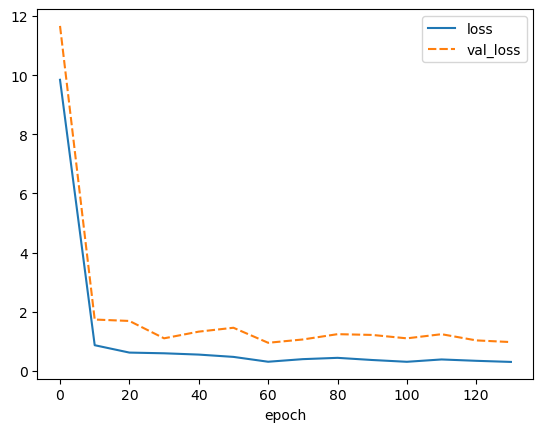

best weights loaded


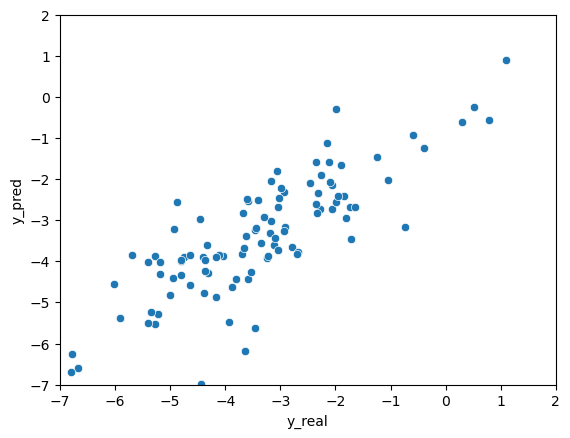

elapsed time: 36.87888050079346
run: 3
{'hidden_feats': [64], 'predictor_hidden_feats': 1024, 'apply_scaffold_split_list': True}
GCNPredictor(
  (gnn): GCN(
    (gnn_layers): ModuleList(
      (0): GCNLayer(
        (graph_conv): GraphConv(in=74, out=64, normalization=none, activation=<function relu at 0x0000015C98418DC0>)
        (dropout): Dropout(p=0.0, inplace=False)
        (res_connection): Linear(in_features=74, out_features=64, bias=True)
        (bn_layer): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
    )
  )
  (readout): WeightedSumAndMax(
    (weight_and_sum): WeightAndSum(
      (atom_weighting): Sequential(
        (0): Linear(in_features=64, out_features=1, bias=True)
        (1): Sigmoid()
      )
    )
  )
  (predict): MLPPredictor(
    (predict): Sequential(
      (0): Dropout(p=0.0, inplace=False)
      (1): Linear(in_features=128, out_features=1024, bias=True)
      (2): ReLU()
      (3): BatchNorm1d(1024, eps=1e-05, momen

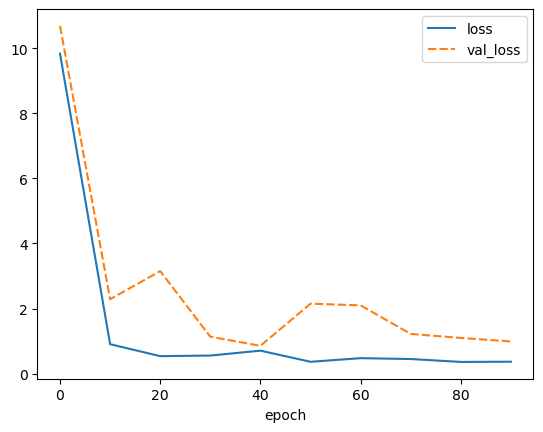

best weights loaded


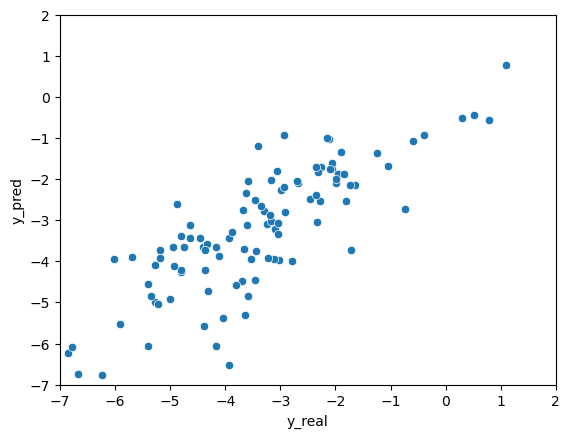

elapsed time: 25.236124277114868
run: 4
{'hidden_feats': [64, 64], 'predictor_hidden_feats': 128, 'apply_scaffold_split_list': True}
GCNPredictor(
  (gnn): GCN(
    (gnn_layers): ModuleList(
      (0): GCNLayer(
        (graph_conv): GraphConv(in=74, out=64, normalization=none, activation=<function relu at 0x0000015C98418DC0>)
        (dropout): Dropout(p=0.0, inplace=False)
        (res_connection): Linear(in_features=74, out_features=64, bias=True)
        (bn_layer): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): GCNLayer(
        (graph_conv): GraphConv(in=64, out=64, normalization=none, activation=<function relu at 0x0000015C98418DC0>)
        (dropout): Dropout(p=0.0, inplace=False)
        (res_connection): Linear(in_features=64, out_features=64, bias=True)
        (bn_layer): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
    )
  )
  (readout): WeightedSumAndMax(
    (weight_and_sum): W

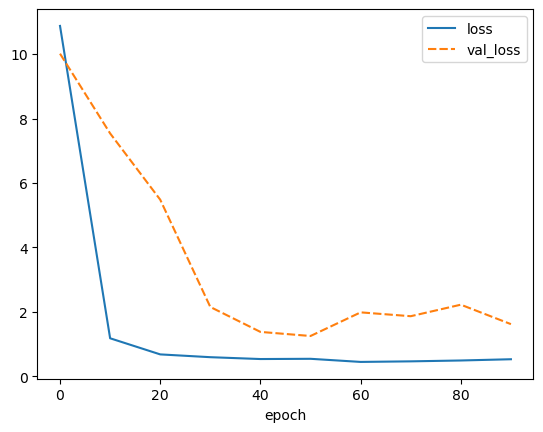

best weights loaded


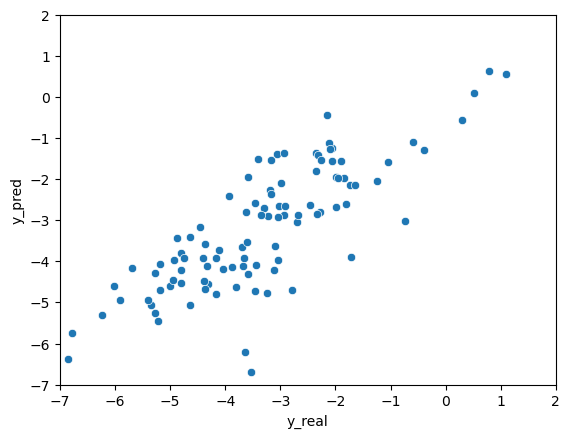

elapsed time: 30.183627605438232
run: 5
{'hidden_feats': [64, 64], 'predictor_hidden_feats': 256, 'apply_scaffold_split_list': True}
GCNPredictor(
  (gnn): GCN(
    (gnn_layers): ModuleList(
      (0): GCNLayer(
        (graph_conv): GraphConv(in=74, out=64, normalization=none, activation=<function relu at 0x0000015C98418DC0>)
        (dropout): Dropout(p=0.0, inplace=False)
        (res_connection): Linear(in_features=74, out_features=64, bias=True)
        (bn_layer): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): GCNLayer(
        (graph_conv): GraphConv(in=64, out=64, normalization=none, activation=<function relu at 0x0000015C98418DC0>)
        (dropout): Dropout(p=0.0, inplace=False)
        (res_connection): Linear(in_features=64, out_features=64, bias=True)
        (bn_layer): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
    )
  )
  (readout): WeightedSumAndMax(
    (weight_and_sum): W

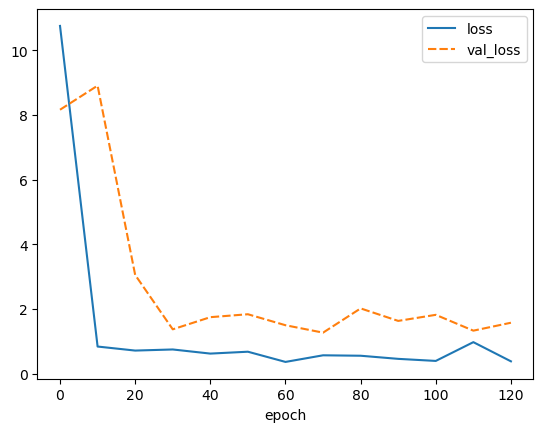

best weights loaded


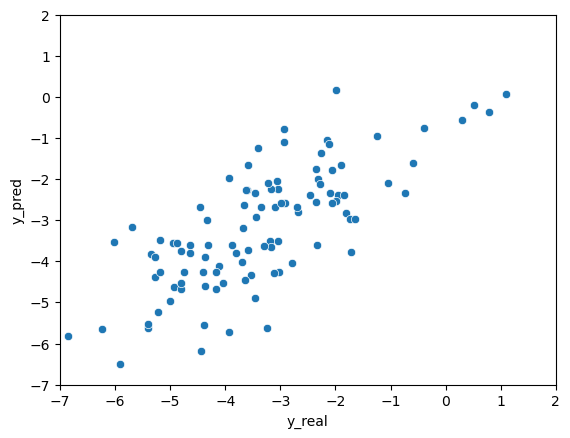

elapsed time: 39.79138112068176
run: 6
{'hidden_feats': [64, 64], 'predictor_hidden_feats': 512, 'apply_scaffold_split_list': True}
GCNPredictor(
  (gnn): GCN(
    (gnn_layers): ModuleList(
      (0): GCNLayer(
        (graph_conv): GraphConv(in=74, out=64, normalization=none, activation=<function relu at 0x0000015C98418DC0>)
        (dropout): Dropout(p=0.0, inplace=False)
        (res_connection): Linear(in_features=74, out_features=64, bias=True)
        (bn_layer): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): GCNLayer(
        (graph_conv): GraphConv(in=64, out=64, normalization=none, activation=<function relu at 0x0000015C98418DC0>)
        (dropout): Dropout(p=0.0, inplace=False)
        (res_connection): Linear(in_features=64, out_features=64, bias=True)
        (bn_layer): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
    )
  )
  (readout): WeightedSumAndMax(
    (weight_and_sum): We

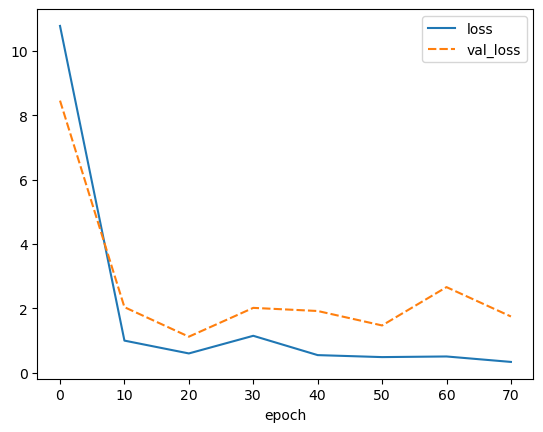

best weights loaded


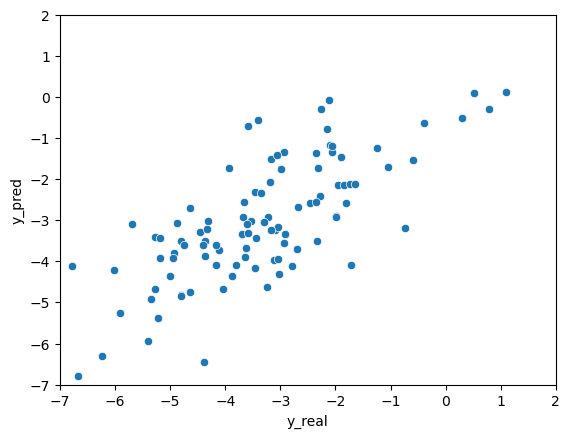

elapsed time: 25.60805630683899
run: 7
{'hidden_feats': [64, 64], 'predictor_hidden_feats': 1024, 'apply_scaffold_split_list': True}
GCNPredictor(
  (gnn): GCN(
    (gnn_layers): ModuleList(
      (0): GCNLayer(
        (graph_conv): GraphConv(in=74, out=64, normalization=none, activation=<function relu at 0x0000015C98418DC0>)
        (dropout): Dropout(p=0.0, inplace=False)
        (res_connection): Linear(in_features=74, out_features=64, bias=True)
        (bn_layer): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): GCNLayer(
        (graph_conv): GraphConv(in=64, out=64, normalization=none, activation=<function relu at 0x0000015C98418DC0>)
        (dropout): Dropout(p=0.0, inplace=False)
        (res_connection): Linear(in_features=64, out_features=64, bias=True)
        (bn_layer): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
    )
  )
  (readout): WeightedSumAndMax(
    (weight_and_sum): W

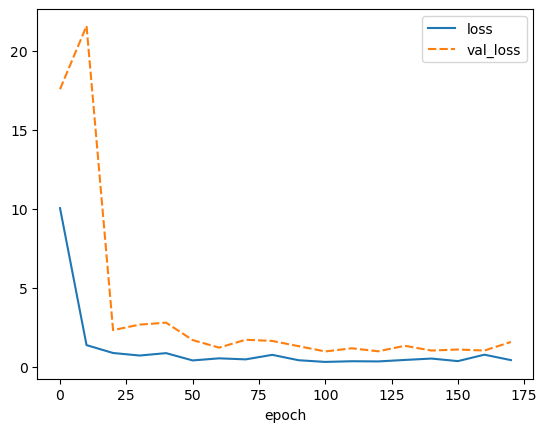

best weights loaded


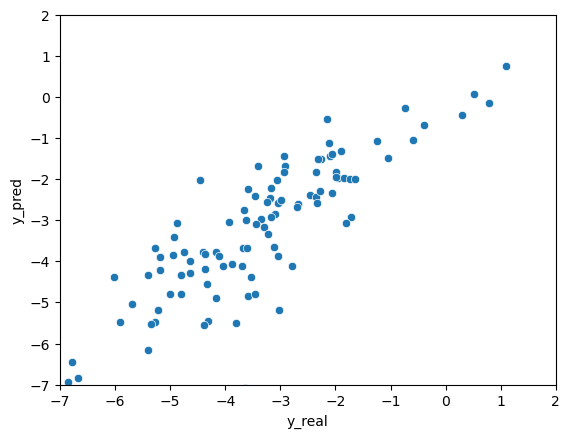

elapsed time: 55.60633850097656
run: 8
{'hidden_feats': [64, 64, 64], 'predictor_hidden_feats': 128, 'apply_scaffold_split_list': True}
GCNPredictor(
  (gnn): GCN(
    (gnn_layers): ModuleList(
      (0): GCNLayer(
        (graph_conv): GraphConv(in=74, out=64, normalization=none, activation=<function relu at 0x0000015C98418DC0>)
        (dropout): Dropout(p=0.0, inplace=False)
        (res_connection): Linear(in_features=74, out_features=64, bias=True)
        (bn_layer): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1-2): 2 x GCNLayer(
        (graph_conv): GraphConv(in=64, out=64, normalization=none, activation=<function relu at 0x0000015C98418DC0>)
        (dropout): Dropout(p=0.0, inplace=False)
        (res_connection): Linear(in_features=64, out_features=64, bias=True)
        (bn_layer): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
    )
  )
  (readout): WeightedSumAndMax(
    (weight_an

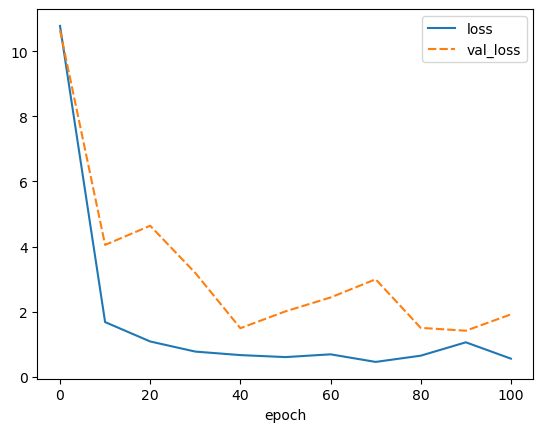

best weights loaded


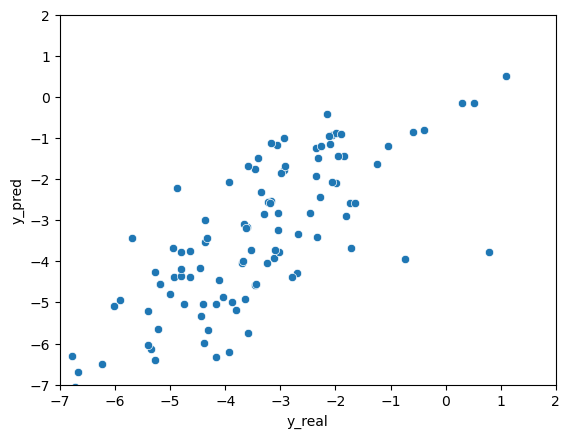

elapsed time: 38.16122102737427
run: 9
{'hidden_feats': [64, 64, 64], 'predictor_hidden_feats': 256, 'apply_scaffold_split_list': True}
GCNPredictor(
  (gnn): GCN(
    (gnn_layers): ModuleList(
      (0): GCNLayer(
        (graph_conv): GraphConv(in=74, out=64, normalization=none, activation=<function relu at 0x0000015C98418DC0>)
        (dropout): Dropout(p=0.0, inplace=False)
        (res_connection): Linear(in_features=74, out_features=64, bias=True)
        (bn_layer): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1-2): 2 x GCNLayer(
        (graph_conv): GraphConv(in=64, out=64, normalization=none, activation=<function relu at 0x0000015C98418DC0>)
        (dropout): Dropout(p=0.0, inplace=False)
        (res_connection): Linear(in_features=64, out_features=64, bias=True)
        (bn_layer): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
    )
  )
  (readout): WeightedSumAndMax(
    (weight_an

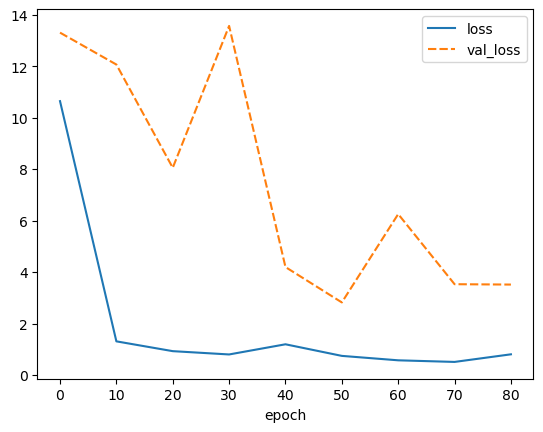

best weights loaded


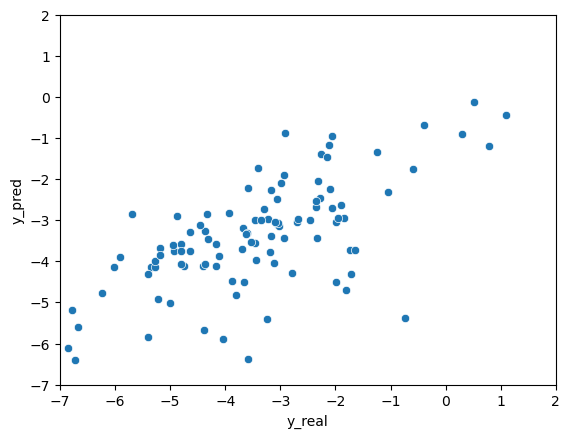

elapsed time: 31.033472776412964
run: 10
{'hidden_feats': [64, 64, 64], 'predictor_hidden_feats': 512, 'apply_scaffold_split_list': True}
GCNPredictor(
  (gnn): GCN(
    (gnn_layers): ModuleList(
      (0): GCNLayer(
        (graph_conv): GraphConv(in=74, out=64, normalization=none, activation=<function relu at 0x0000015C98418DC0>)
        (dropout): Dropout(p=0.0, inplace=False)
        (res_connection): Linear(in_features=74, out_features=64, bias=True)
        (bn_layer): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1-2): 2 x GCNLayer(
        (graph_conv): GraphConv(in=64, out=64, normalization=none, activation=<function relu at 0x0000015C98418DC0>)
        (dropout): Dropout(p=0.0, inplace=False)
        (res_connection): Linear(in_features=64, out_features=64, bias=True)
        (bn_layer): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
    )
  )
  (readout): WeightedSumAndMax(
    (weight_

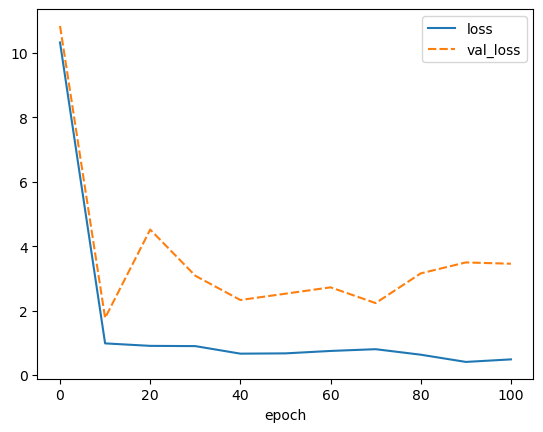

best weights loaded


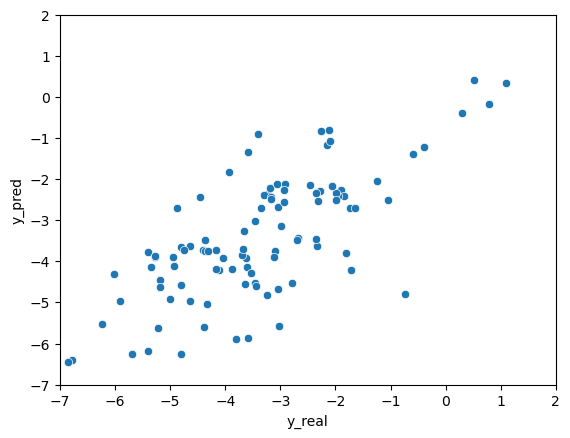

elapsed time: 38.62829566001892
run: 11
{'hidden_feats': [64, 64, 64], 'predictor_hidden_feats': 1024, 'apply_scaffold_split_list': True}
GCNPredictor(
  (gnn): GCN(
    (gnn_layers): ModuleList(
      (0): GCNLayer(
        (graph_conv): GraphConv(in=74, out=64, normalization=none, activation=<function relu at 0x0000015C98418DC0>)
        (dropout): Dropout(p=0.0, inplace=False)
        (res_connection): Linear(in_features=74, out_features=64, bias=True)
        (bn_layer): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1-2): 2 x GCNLayer(
        (graph_conv): GraphConv(in=64, out=64, normalization=none, activation=<function relu at 0x0000015C98418DC0>)
        (dropout): Dropout(p=0.0, inplace=False)
        (res_connection): Linear(in_features=64, out_features=64, bias=True)
        (bn_layer): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
    )
  )
  (readout): WeightedSumAndMax(
    (weight_

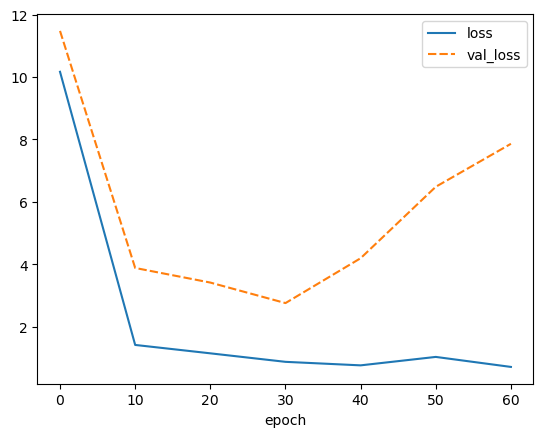

best weights loaded


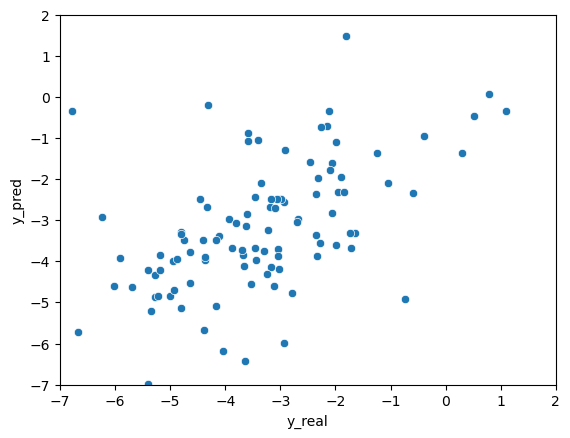

elapsed time: 24.030266046524048
run: 12
{'hidden_feats': [64, 64, 64, 64], 'predictor_hidden_feats': 128, 'apply_scaffold_split_list': True}
GCNPredictor(
  (gnn): GCN(
    (gnn_layers): ModuleList(
      (0): GCNLayer(
        (graph_conv): GraphConv(in=74, out=64, normalization=none, activation=<function relu at 0x0000015C98418DC0>)
        (dropout): Dropout(p=0.0, inplace=False)
        (res_connection): Linear(in_features=74, out_features=64, bias=True)
        (bn_layer): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1-3): 3 x GCNLayer(
        (graph_conv): GraphConv(in=64, out=64, normalization=none, activation=<function relu at 0x0000015C98418DC0>)
        (dropout): Dropout(p=0.0, inplace=False)
        (res_connection): Linear(in_features=64, out_features=64, bias=True)
        (bn_layer): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
    )
  )
  (readout): WeightedSumAndMax(
    (wei

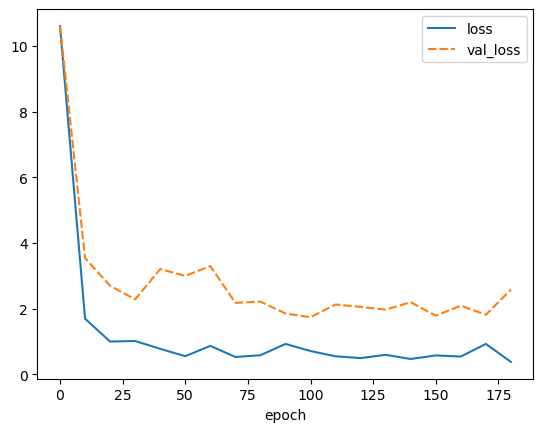

best weights loaded


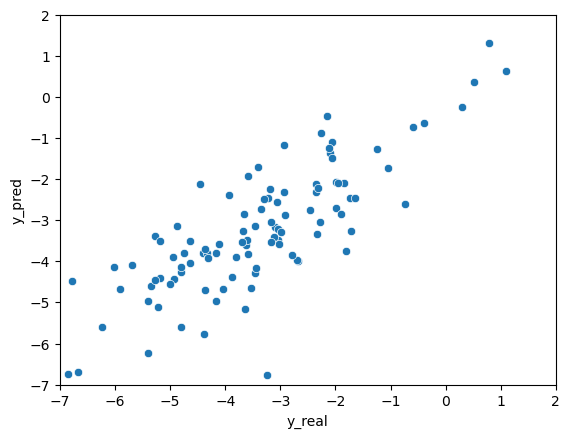

elapsed time: 73.104012966156
run: 13
{'hidden_feats': [64, 64, 64, 64], 'predictor_hidden_feats': 256, 'apply_scaffold_split_list': True}
GCNPredictor(
  (gnn): GCN(
    (gnn_layers): ModuleList(
      (0): GCNLayer(
        (graph_conv): GraphConv(in=74, out=64, normalization=none, activation=<function relu at 0x0000015C98418DC0>)
        (dropout): Dropout(p=0.0, inplace=False)
        (res_connection): Linear(in_features=74, out_features=64, bias=True)
        (bn_layer): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1-3): 3 x GCNLayer(
        (graph_conv): GraphConv(in=64, out=64, normalization=none, activation=<function relu at 0x0000015C98418DC0>)
        (dropout): Dropout(p=0.0, inplace=False)
        (res_connection): Linear(in_features=64, out_features=64, bias=True)
        (bn_layer): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
    )
  )
  (readout): WeightedSumAndMax(
    (weight

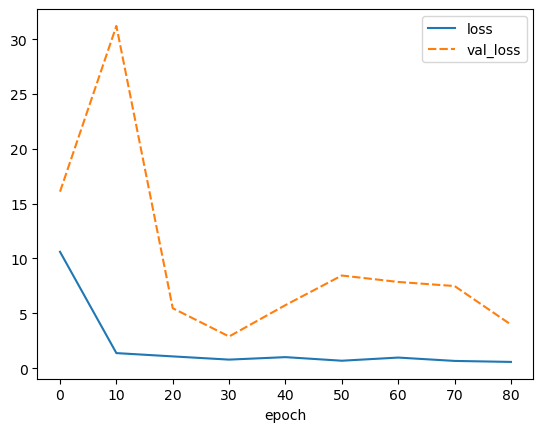

best weights loaded


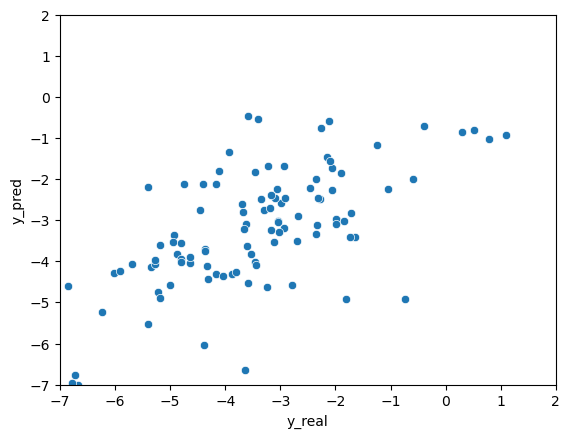

elapsed time: 32.659266233444214
run: 14
{'hidden_feats': [64, 64, 64, 64], 'predictor_hidden_feats': 512, 'apply_scaffold_split_list': True}
GCNPredictor(
  (gnn): GCN(
    (gnn_layers): ModuleList(
      (0): GCNLayer(
        (graph_conv): GraphConv(in=74, out=64, normalization=none, activation=<function relu at 0x0000015C98418DC0>)
        (dropout): Dropout(p=0.0, inplace=False)
        (res_connection): Linear(in_features=74, out_features=64, bias=True)
        (bn_layer): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1-3): 3 x GCNLayer(
        (graph_conv): GraphConv(in=64, out=64, normalization=none, activation=<function relu at 0x0000015C98418DC0>)
        (dropout): Dropout(p=0.0, inplace=False)
        (res_connection): Linear(in_features=64, out_features=64, bias=True)
        (bn_layer): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
    )
  )
  (readout): WeightedSumAndMax(
    (wei

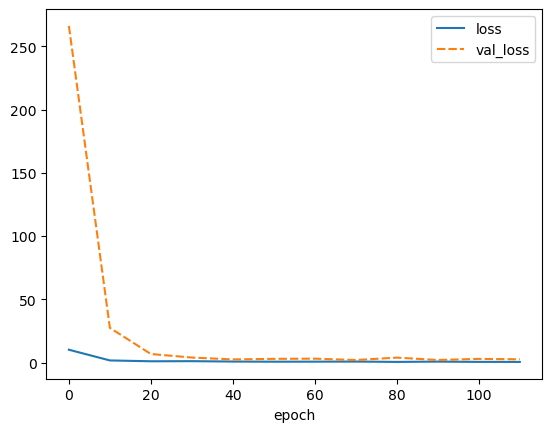

best weights loaded


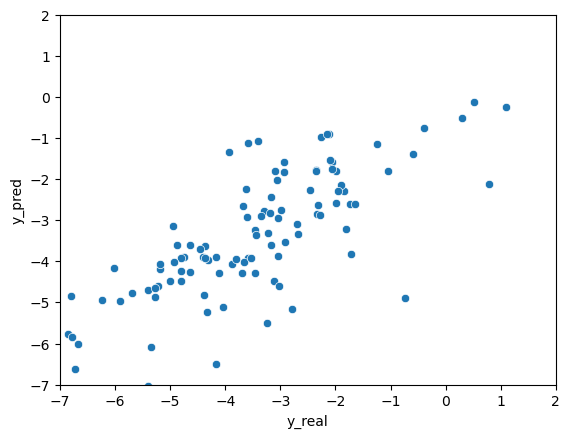

elapsed time: 47.951942920684814
run: 15
{'hidden_feats': [64, 64, 64, 64], 'predictor_hidden_feats': 1024, 'apply_scaffold_split_list': True}
GCNPredictor(
  (gnn): GCN(
    (gnn_layers): ModuleList(
      (0): GCNLayer(
        (graph_conv): GraphConv(in=74, out=64, normalization=none, activation=<function relu at 0x0000015C98418DC0>)
        (dropout): Dropout(p=0.0, inplace=False)
        (res_connection): Linear(in_features=74, out_features=64, bias=True)
        (bn_layer): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1-3): 3 x GCNLayer(
        (graph_conv): GraphConv(in=64, out=64, normalization=none, activation=<function relu at 0x0000015C98418DC0>)
        (dropout): Dropout(p=0.0, inplace=False)
        (res_connection): Linear(in_features=64, out_features=64, bias=True)
        (bn_layer): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
    )
  )
  (readout): WeightedSumAndMax(
    (we

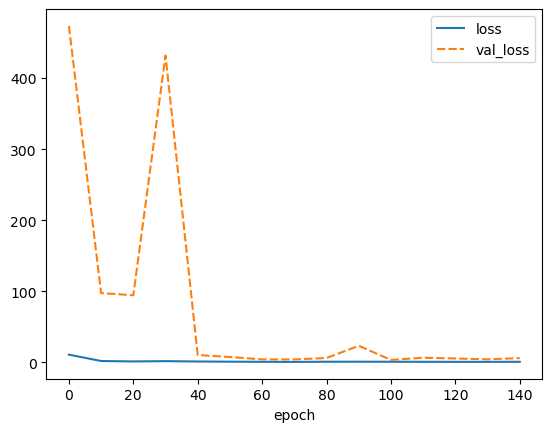

best weights loaded


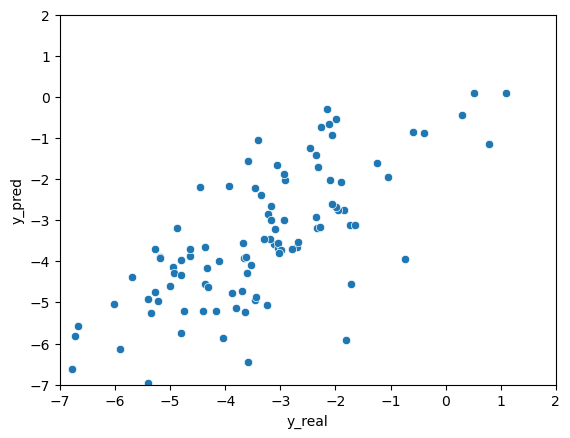

elapsed time: 60.864784955978394
run: 16
{'hidden_feats': [128], 'predictor_hidden_feats': 128, 'apply_scaffold_split_list': True}
GCNPredictor(
  (gnn): GCN(
    (gnn_layers): ModuleList(
      (0): GCNLayer(
        (graph_conv): GraphConv(in=74, out=128, normalization=none, activation=<function relu at 0x0000015C98418DC0>)
        (dropout): Dropout(p=0.0, inplace=False)
        (res_connection): Linear(in_features=74, out_features=128, bias=True)
        (bn_layer): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
    )
  )
  (readout): WeightedSumAndMax(
    (weight_and_sum): WeightAndSum(
      (atom_weighting): Sequential(
        (0): Linear(in_features=128, out_features=1, bias=True)
        (1): Sigmoid()
      )
    )
  )
  (predict): MLPPredictor(
    (predict): Sequential(
      (0): Dropout(p=0.0, inplace=False)
      (1): Linear(in_features=256, out_features=128, bias=True)
      (2): ReLU()
      (3): BatchNorm1d(128, eps=1e-05, m

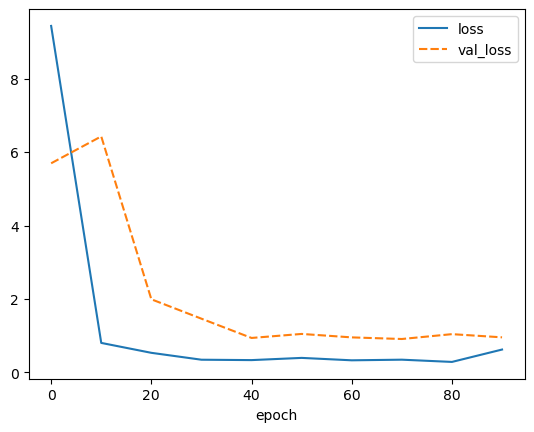

best weights loaded


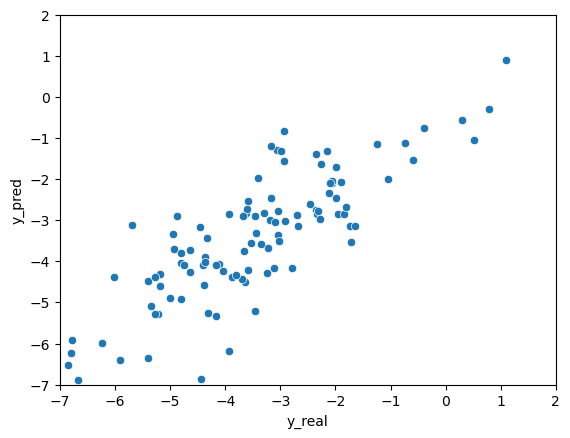

elapsed time: 22.138380765914917
run: 17
{'hidden_feats': [128], 'predictor_hidden_feats': 256, 'apply_scaffold_split_list': True}
GCNPredictor(
  (gnn): GCN(
    (gnn_layers): ModuleList(
      (0): GCNLayer(
        (graph_conv): GraphConv(in=74, out=128, normalization=none, activation=<function relu at 0x0000015C98418DC0>)
        (dropout): Dropout(p=0.0, inplace=False)
        (res_connection): Linear(in_features=74, out_features=128, bias=True)
        (bn_layer): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
    )
  )
  (readout): WeightedSumAndMax(
    (weight_and_sum): WeightAndSum(
      (atom_weighting): Sequential(
        (0): Linear(in_features=128, out_features=1, bias=True)
        (1): Sigmoid()
      )
    )
  )
  (predict): MLPPredictor(
    (predict): Sequential(
      (0): Dropout(p=0.0, inplace=False)
      (1): Linear(in_features=256, out_features=256, bias=True)
      (2): ReLU()
      (3): BatchNorm1d(256, eps=1e-05, m

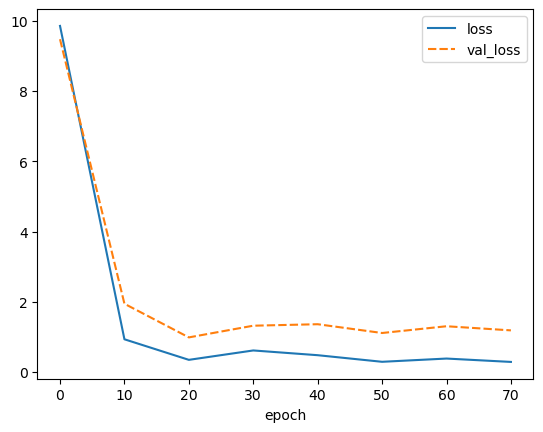

best weights loaded


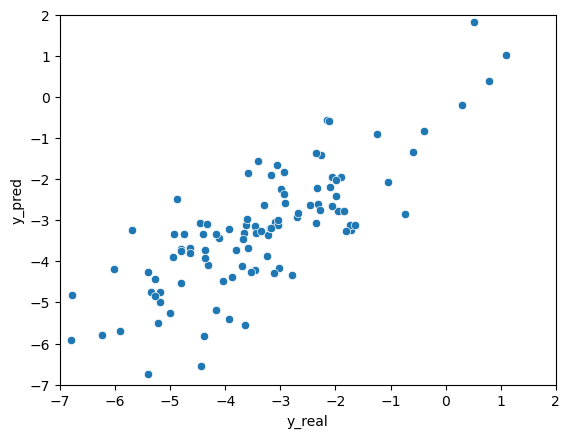

elapsed time: 17.469671964645386
run: 18
{'hidden_feats': [128], 'predictor_hidden_feats': 512, 'apply_scaffold_split_list': True}
GCNPredictor(
  (gnn): GCN(
    (gnn_layers): ModuleList(
      (0): GCNLayer(
        (graph_conv): GraphConv(in=74, out=128, normalization=none, activation=<function relu at 0x0000015C98418DC0>)
        (dropout): Dropout(p=0.0, inplace=False)
        (res_connection): Linear(in_features=74, out_features=128, bias=True)
        (bn_layer): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
    )
  )
  (readout): WeightedSumAndMax(
    (weight_and_sum): WeightAndSum(
      (atom_weighting): Sequential(
        (0): Linear(in_features=128, out_features=1, bias=True)
        (1): Sigmoid()
      )
    )
  )
  (predict): MLPPredictor(
    (predict): Sequential(
      (0): Dropout(p=0.0, inplace=False)
      (1): Linear(in_features=256, out_features=512, bias=True)
      (2): ReLU()
      (3): BatchNorm1d(512, eps=1e-05, m

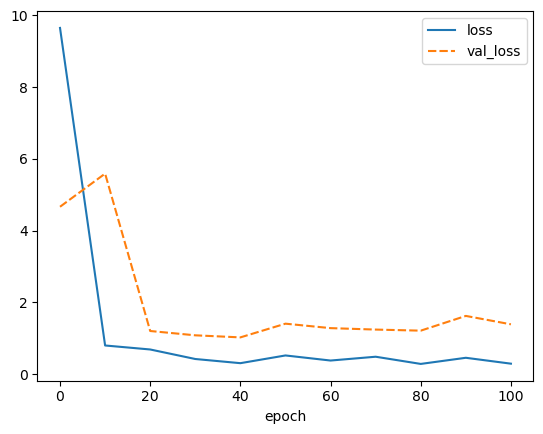

best weights loaded


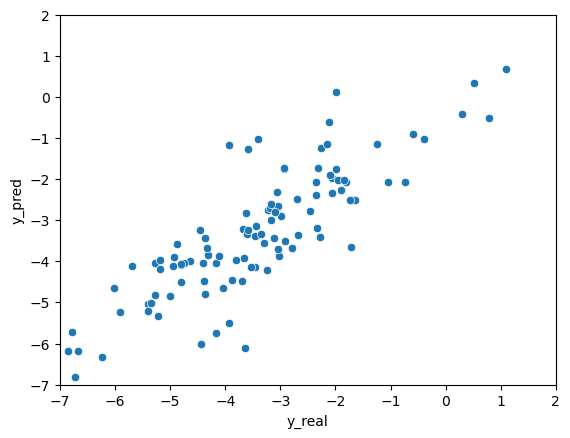

elapsed time: 24.659360647201538
run: 19
{'hidden_feats': [128], 'predictor_hidden_feats': 1024, 'apply_scaffold_split_list': True}
GCNPredictor(
  (gnn): GCN(
    (gnn_layers): ModuleList(
      (0): GCNLayer(
        (graph_conv): GraphConv(in=74, out=128, normalization=none, activation=<function relu at 0x0000015C98418DC0>)
        (dropout): Dropout(p=0.0, inplace=False)
        (res_connection): Linear(in_features=74, out_features=128, bias=True)
        (bn_layer): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
    )
  )
  (readout): WeightedSumAndMax(
    (weight_and_sum): WeightAndSum(
      (atom_weighting): Sequential(
        (0): Linear(in_features=128, out_features=1, bias=True)
        (1): Sigmoid()
      )
    )
  )
  (predict): MLPPredictor(
    (predict): Sequential(
      (0): Dropout(p=0.0, inplace=False)
      (1): Linear(in_features=256, out_features=1024, bias=True)
      (2): ReLU()
      (3): BatchNorm1d(1024, eps=1e-05

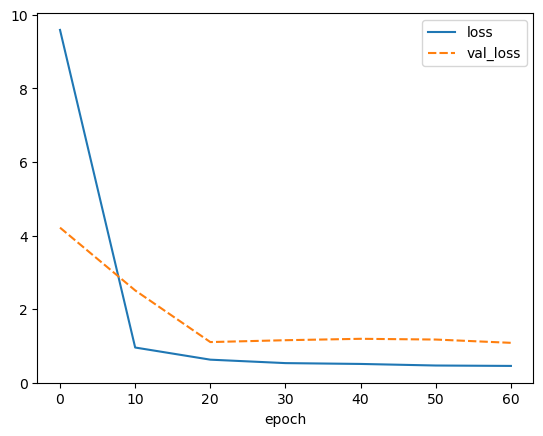

best weights loaded


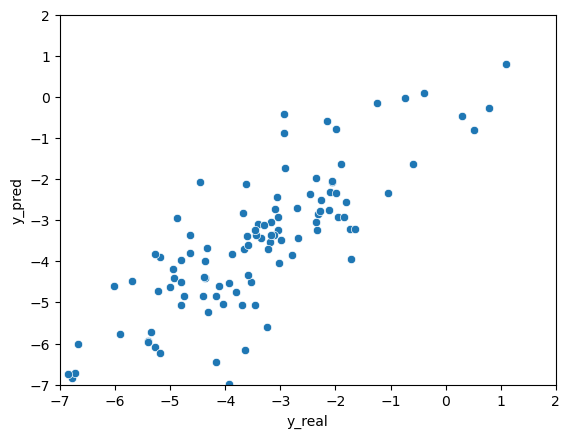

elapsed time: 16.34622836112976
run: 20
{'hidden_feats': [128, 128], 'predictor_hidden_feats': 128, 'apply_scaffold_split_list': True}
GCNPredictor(
  (gnn): GCN(
    (gnn_layers): ModuleList(
      (0): GCNLayer(
        (graph_conv): GraphConv(in=74, out=128, normalization=none, activation=<function relu at 0x0000015C98418DC0>)
        (dropout): Dropout(p=0.0, inplace=False)
        (res_connection): Linear(in_features=74, out_features=128, bias=True)
        (bn_layer): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): GCNLayer(
        (graph_conv): GraphConv(in=128, out=128, normalization=none, activation=<function relu at 0x0000015C98418DC0>)
        (dropout): Dropout(p=0.0, inplace=False)
        (res_connection): Linear(in_features=128, out_features=128, bias=True)
        (bn_layer): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
    )
  )
  (readout): WeightedSumAndMax(
    (weight_a

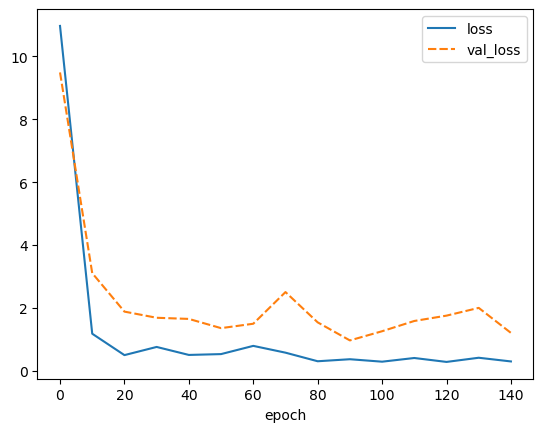

best weights loaded


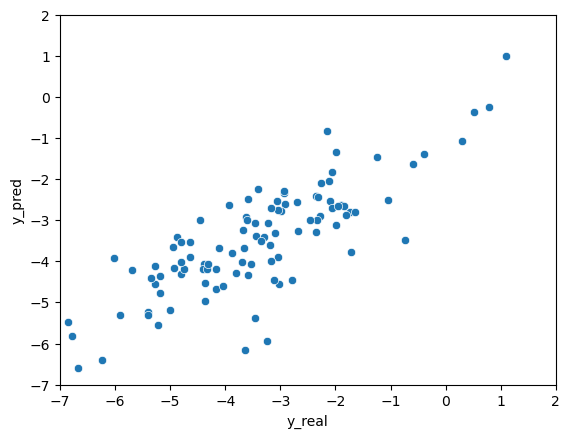

elapsed time: 43.203208208084106
run: 21
{'hidden_feats': [128, 128], 'predictor_hidden_feats': 256, 'apply_scaffold_split_list': True}
GCNPredictor(
  (gnn): GCN(
    (gnn_layers): ModuleList(
      (0): GCNLayer(
        (graph_conv): GraphConv(in=74, out=128, normalization=none, activation=<function relu at 0x0000015C98418DC0>)
        (dropout): Dropout(p=0.0, inplace=False)
        (res_connection): Linear(in_features=74, out_features=128, bias=True)
        (bn_layer): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): GCNLayer(
        (graph_conv): GraphConv(in=128, out=128, normalization=none, activation=<function relu at 0x0000015C98418DC0>)
        (dropout): Dropout(p=0.0, inplace=False)
        (res_connection): Linear(in_features=128, out_features=128, bias=True)
        (bn_layer): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
    )
  )
  (readout): WeightedSumAndMax(
    (weight_

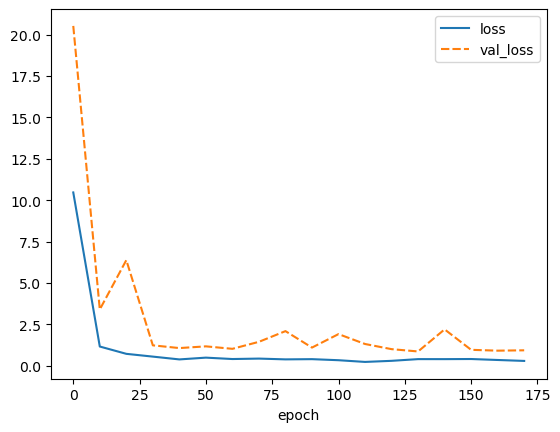

best weights loaded


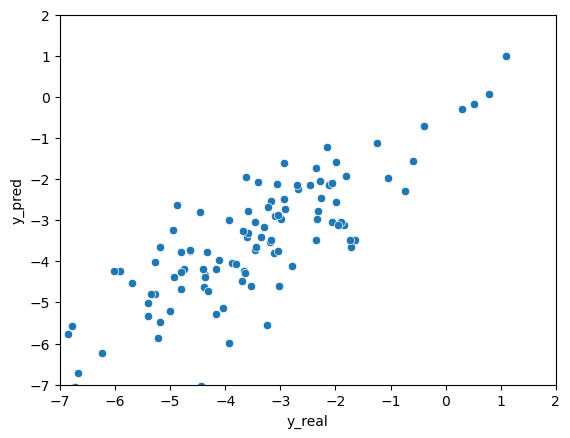

elapsed time: 54.7391459941864
run: 22
{'hidden_feats': [128, 128], 'predictor_hidden_feats': 512, 'apply_scaffold_split_list': True}
GCNPredictor(
  (gnn): GCN(
    (gnn_layers): ModuleList(
      (0): GCNLayer(
        (graph_conv): GraphConv(in=74, out=128, normalization=none, activation=<function relu at 0x0000015C98418DC0>)
        (dropout): Dropout(p=0.0, inplace=False)
        (res_connection): Linear(in_features=74, out_features=128, bias=True)
        (bn_layer): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): GCNLayer(
        (graph_conv): GraphConv(in=128, out=128, normalization=none, activation=<function relu at 0x0000015C98418DC0>)
        (dropout): Dropout(p=0.0, inplace=False)
        (res_connection): Linear(in_features=128, out_features=128, bias=True)
        (bn_layer): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
    )
  )
  (readout): WeightedSumAndMax(
    (weight_an

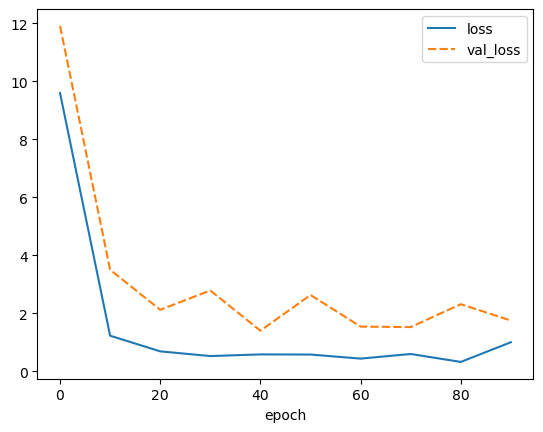

best weights loaded


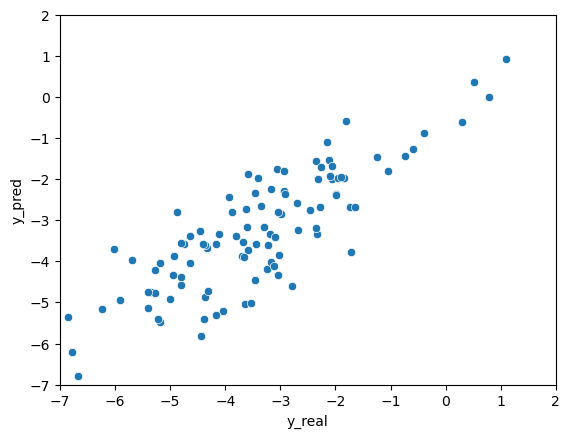

elapsed time: 29.760167121887207
run: 23
{'hidden_feats': [128, 128], 'predictor_hidden_feats': 1024, 'apply_scaffold_split_list': True}
GCNPredictor(
  (gnn): GCN(
    (gnn_layers): ModuleList(
      (0): GCNLayer(
        (graph_conv): GraphConv(in=74, out=128, normalization=none, activation=<function relu at 0x0000015C98418DC0>)
        (dropout): Dropout(p=0.0, inplace=False)
        (res_connection): Linear(in_features=74, out_features=128, bias=True)
        (bn_layer): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): GCNLayer(
        (graph_conv): GraphConv(in=128, out=128, normalization=none, activation=<function relu at 0x0000015C98418DC0>)
        (dropout): Dropout(p=0.0, inplace=False)
        (res_connection): Linear(in_features=128, out_features=128, bias=True)
        (bn_layer): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
    )
  )
  (readout): WeightedSumAndMax(
    (weight

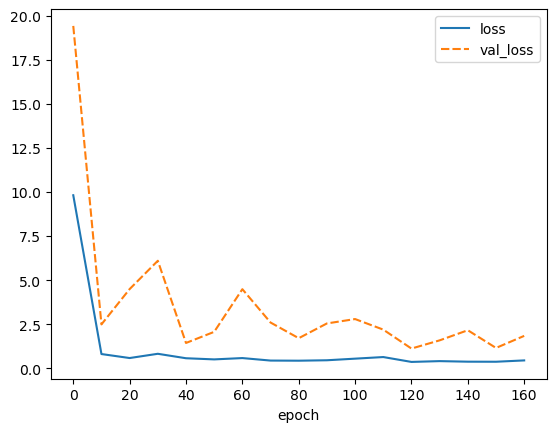

best weights loaded


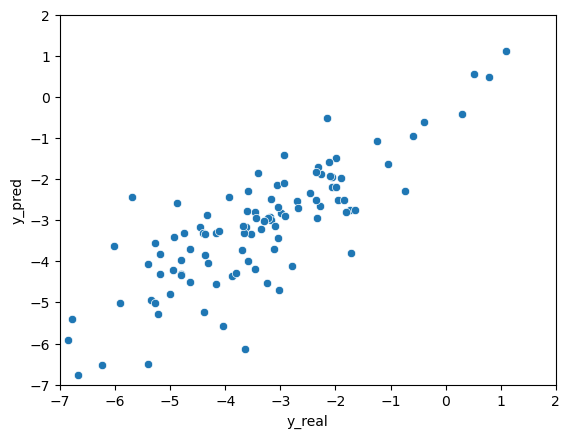

elapsed time: 53.39509916305542
run: 24
{'hidden_feats': [128, 128, 128], 'predictor_hidden_feats': 128, 'apply_scaffold_split_list': True}
GCNPredictor(
  (gnn): GCN(
    (gnn_layers): ModuleList(
      (0): GCNLayer(
        (graph_conv): GraphConv(in=74, out=128, normalization=none, activation=<function relu at 0x0000015C98418DC0>)
        (dropout): Dropout(p=0.0, inplace=False)
        (res_connection): Linear(in_features=74, out_features=128, bias=True)
        (bn_layer): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1-2): 2 x GCNLayer(
        (graph_conv): GraphConv(in=128, out=128, normalization=none, activation=<function relu at 0x0000015C98418DC0>)
        (dropout): Dropout(p=0.0, inplace=False)
        (res_connection): Linear(in_features=128, out_features=128, bias=True)
        (bn_layer): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
    )
  )
  (readout): WeightedSumAndMax(
  

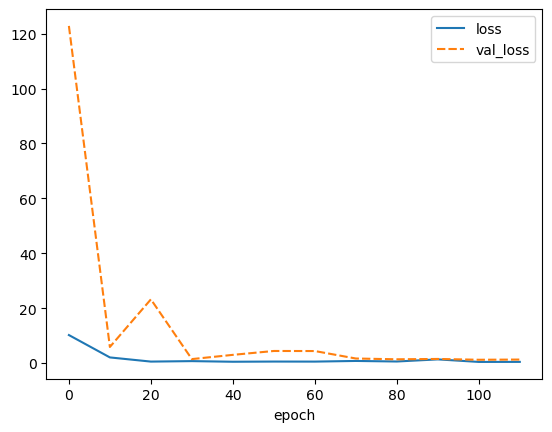

best weights loaded


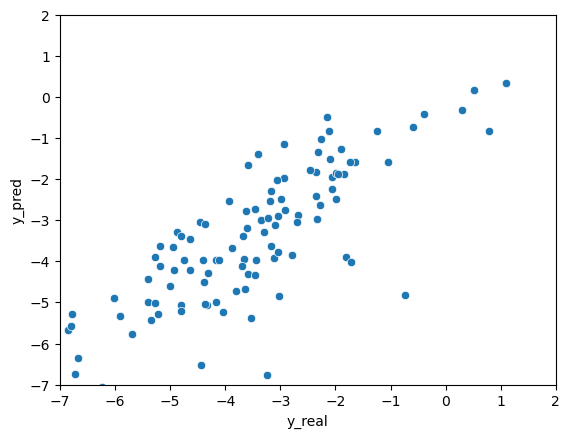

elapsed time: 40.381035566329956
run: 25
{'hidden_feats': [128, 128, 128], 'predictor_hidden_feats': 256, 'apply_scaffold_split_list': True}
GCNPredictor(
  (gnn): GCN(
    (gnn_layers): ModuleList(
      (0): GCNLayer(
        (graph_conv): GraphConv(in=74, out=128, normalization=none, activation=<function relu at 0x0000015C98418DC0>)
        (dropout): Dropout(p=0.0, inplace=False)
        (res_connection): Linear(in_features=74, out_features=128, bias=True)
        (bn_layer): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1-2): 2 x GCNLayer(
        (graph_conv): GraphConv(in=128, out=128, normalization=none, activation=<function relu at 0x0000015C98418DC0>)
        (dropout): Dropout(p=0.0, inplace=False)
        (res_connection): Linear(in_features=128, out_features=128, bias=True)
        (bn_layer): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
    )
  )
  (readout): WeightedSumAndMax(
 

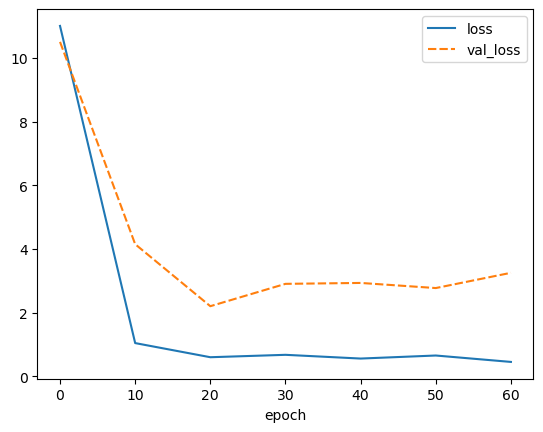

best weights loaded


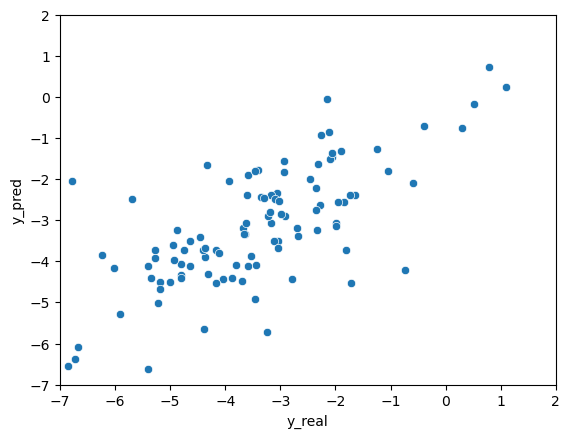

elapsed time: 23.510163068771362
run: 26
{'hidden_feats': [128, 128, 128], 'predictor_hidden_feats': 512, 'apply_scaffold_split_list': True}
GCNPredictor(
  (gnn): GCN(
    (gnn_layers): ModuleList(
      (0): GCNLayer(
        (graph_conv): GraphConv(in=74, out=128, normalization=none, activation=<function relu at 0x0000015C98418DC0>)
        (dropout): Dropout(p=0.0, inplace=False)
        (res_connection): Linear(in_features=74, out_features=128, bias=True)
        (bn_layer): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1-2): 2 x GCNLayer(
        (graph_conv): GraphConv(in=128, out=128, normalization=none, activation=<function relu at 0x0000015C98418DC0>)
        (dropout): Dropout(p=0.0, inplace=False)
        (res_connection): Linear(in_features=128, out_features=128, bias=True)
        (bn_layer): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
    )
  )
  (readout): WeightedSumAndMax(
 

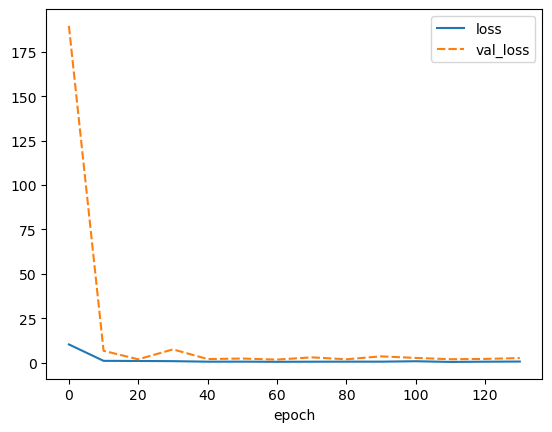

best weights loaded


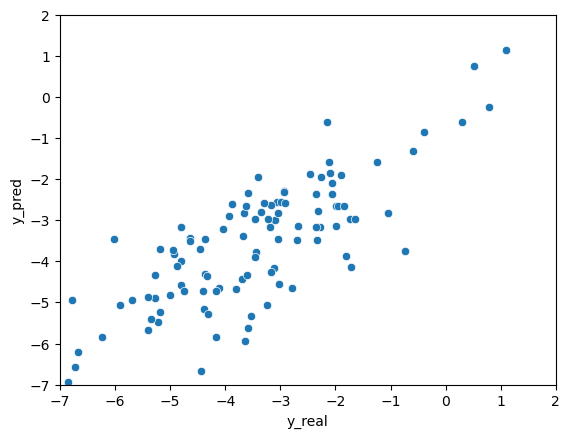

elapsed time: 46.45222187042236
run: 27
{'hidden_feats': [128, 128, 128], 'predictor_hidden_feats': 1024, 'apply_scaffold_split_list': True}
GCNPredictor(
  (gnn): GCN(
    (gnn_layers): ModuleList(
      (0): GCNLayer(
        (graph_conv): GraphConv(in=74, out=128, normalization=none, activation=<function relu at 0x0000015C98418DC0>)
        (dropout): Dropout(p=0.0, inplace=False)
        (res_connection): Linear(in_features=74, out_features=128, bias=True)
        (bn_layer): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1-2): 2 x GCNLayer(
        (graph_conv): GraphConv(in=128, out=128, normalization=none, activation=<function relu at 0x0000015C98418DC0>)
        (dropout): Dropout(p=0.0, inplace=False)
        (res_connection): Linear(in_features=128, out_features=128, bias=True)
        (bn_layer): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
    )
  )
  (readout): WeightedSumAndMax(
 

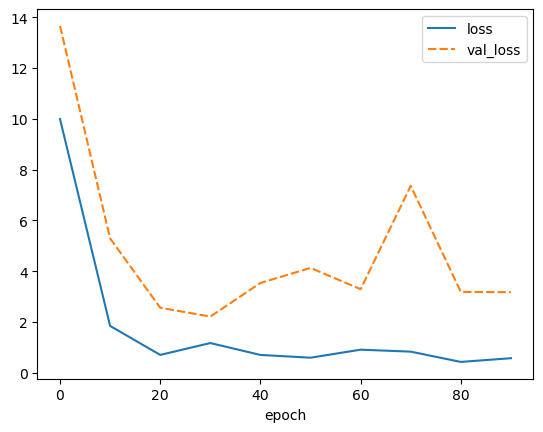

best weights loaded


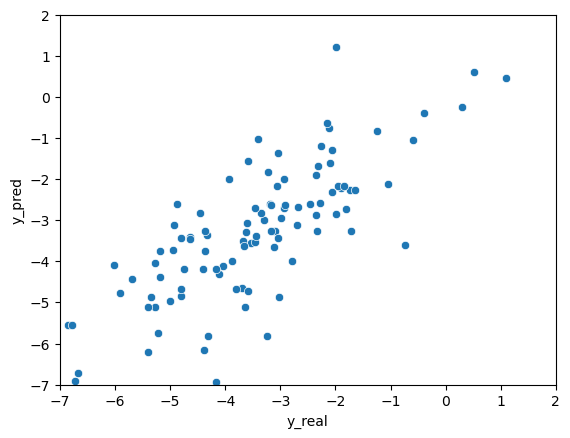

elapsed time: 33.02331304550171
run: 28
{'hidden_feats': [128, 128, 128, 128], 'predictor_hidden_feats': 128, 'apply_scaffold_split_list': True}
GCNPredictor(
  (gnn): GCN(
    (gnn_layers): ModuleList(
      (0): GCNLayer(
        (graph_conv): GraphConv(in=74, out=128, normalization=none, activation=<function relu at 0x0000015C98418DC0>)
        (dropout): Dropout(p=0.0, inplace=False)
        (res_connection): Linear(in_features=74, out_features=128, bias=True)
        (bn_layer): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1-3): 3 x GCNLayer(
        (graph_conv): GraphConv(in=128, out=128, normalization=none, activation=<function relu at 0x0000015C98418DC0>)
        (dropout): Dropout(p=0.0, inplace=False)
        (res_connection): Linear(in_features=128, out_features=128, bias=True)
        (bn_layer): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
    )
  )
  (readout): WeightedSumAndMa

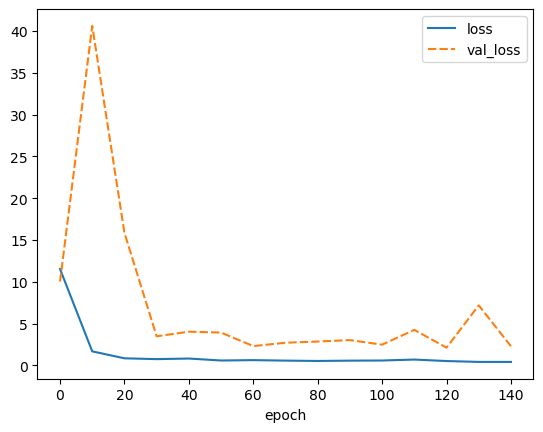

best weights loaded


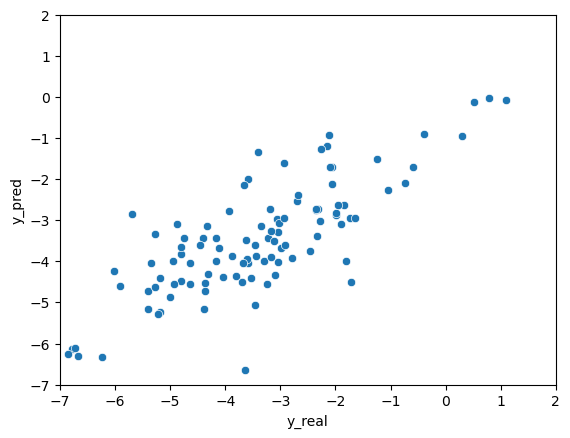

elapsed time: 57.300262689590454
run: 29
{'hidden_feats': [128, 128, 128, 128], 'predictor_hidden_feats': 256, 'apply_scaffold_split_list': True}
GCNPredictor(
  (gnn): GCN(
    (gnn_layers): ModuleList(
      (0): GCNLayer(
        (graph_conv): GraphConv(in=74, out=128, normalization=none, activation=<function relu at 0x0000015C98418DC0>)
        (dropout): Dropout(p=0.0, inplace=False)
        (res_connection): Linear(in_features=74, out_features=128, bias=True)
        (bn_layer): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1-3): 3 x GCNLayer(
        (graph_conv): GraphConv(in=128, out=128, normalization=none, activation=<function relu at 0x0000015C98418DC0>)
        (dropout): Dropout(p=0.0, inplace=False)
        (res_connection): Linear(in_features=128, out_features=128, bias=True)
        (bn_layer): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
    )
  )
  (readout): WeightedSumAndM

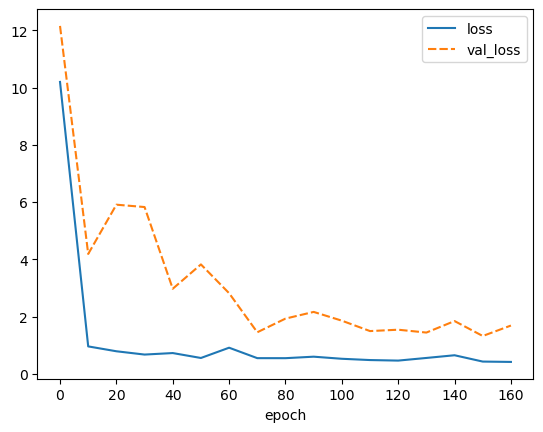

best weights loaded


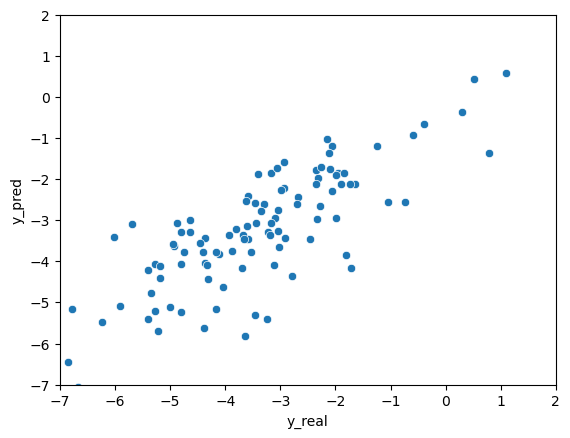

elapsed time: 64.8173155784607
run: 30
{'hidden_feats': [128, 128, 128, 128], 'predictor_hidden_feats': 512, 'apply_scaffold_split_list': True}
GCNPredictor(
  (gnn): GCN(
    (gnn_layers): ModuleList(
      (0): GCNLayer(
        (graph_conv): GraphConv(in=74, out=128, normalization=none, activation=<function relu at 0x0000015C98418DC0>)
        (dropout): Dropout(p=0.0, inplace=False)
        (res_connection): Linear(in_features=74, out_features=128, bias=True)
        (bn_layer): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1-3): 3 x GCNLayer(
        (graph_conv): GraphConv(in=128, out=128, normalization=none, activation=<function relu at 0x0000015C98418DC0>)
        (dropout): Dropout(p=0.0, inplace=False)
        (res_connection): Linear(in_features=128, out_features=128, bias=True)
        (bn_layer): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
    )
  )
  (readout): WeightedSumAndMax

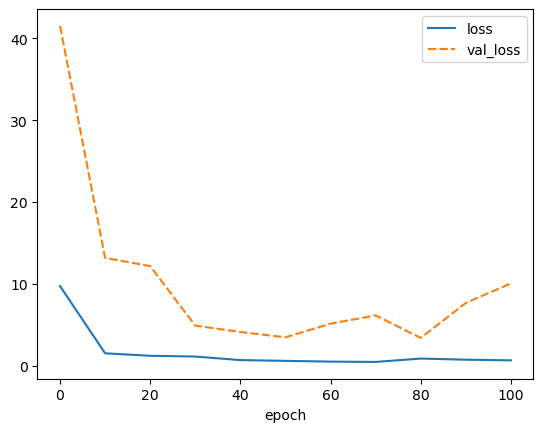

best weights loaded


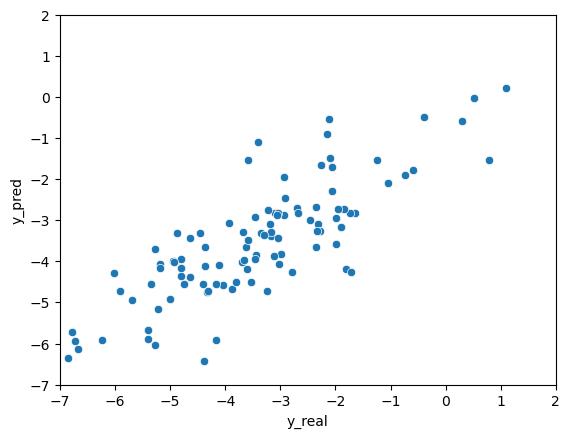

elapsed time: 40.427056550979614
run: 31
{'hidden_feats': [128, 128, 128, 128], 'predictor_hidden_feats': 1024, 'apply_scaffold_split_list': True}
GCNPredictor(
  (gnn): GCN(
    (gnn_layers): ModuleList(
      (0): GCNLayer(
        (graph_conv): GraphConv(in=74, out=128, normalization=none, activation=<function relu at 0x0000015C98418DC0>)
        (dropout): Dropout(p=0.0, inplace=False)
        (res_connection): Linear(in_features=74, out_features=128, bias=True)
        (bn_layer): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1-3): 3 x GCNLayer(
        (graph_conv): GraphConv(in=128, out=128, normalization=none, activation=<function relu at 0x0000015C98418DC0>)
        (dropout): Dropout(p=0.0, inplace=False)
        (res_connection): Linear(in_features=128, out_features=128, bias=True)
        (bn_layer): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
    )
  )
  (readout): WeightedSumAnd

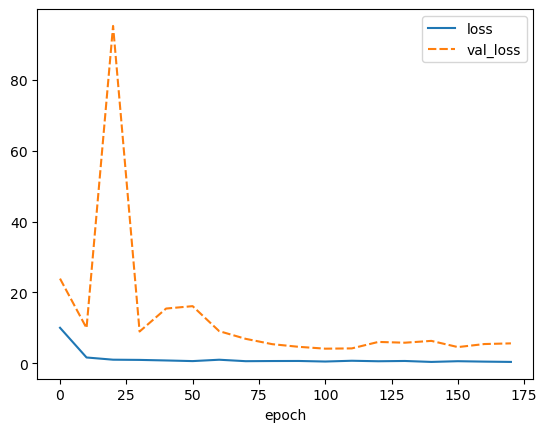

best weights loaded


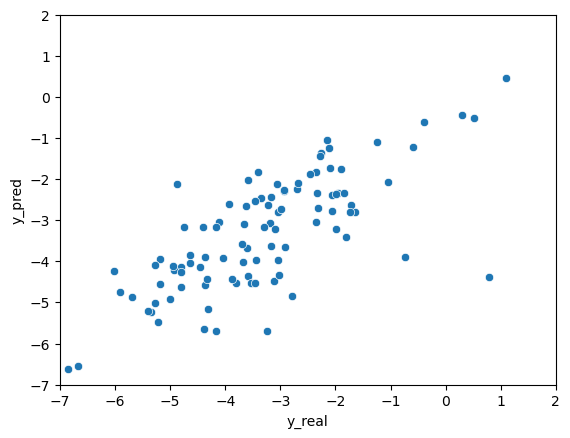

elapsed time: 69.94724464416504
run: 32
{'hidden_feats': [256], 'predictor_hidden_feats': 128, 'apply_scaffold_split_list': True}
GCNPredictor(
  (gnn): GCN(
    (gnn_layers): ModuleList(
      (0): GCNLayer(
        (graph_conv): GraphConv(in=74, out=256, normalization=none, activation=<function relu at 0x0000015C98418DC0>)
        (dropout): Dropout(p=0.0, inplace=False)
        (res_connection): Linear(in_features=74, out_features=256, bias=True)
        (bn_layer): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
    )
  )
  (readout): WeightedSumAndMax(
    (weight_and_sum): WeightAndSum(
      (atom_weighting): Sequential(
        (0): Linear(in_features=256, out_features=1, bias=True)
        (1): Sigmoid()
      )
    )
  )
  (predict): MLPPredictor(
    (predict): Sequential(
      (0): Dropout(p=0.0, inplace=False)
      (1): Linear(in_features=512, out_features=128, bias=True)
      (2): ReLU()
      (3): BatchNorm1d(128, eps=1e-05, mo

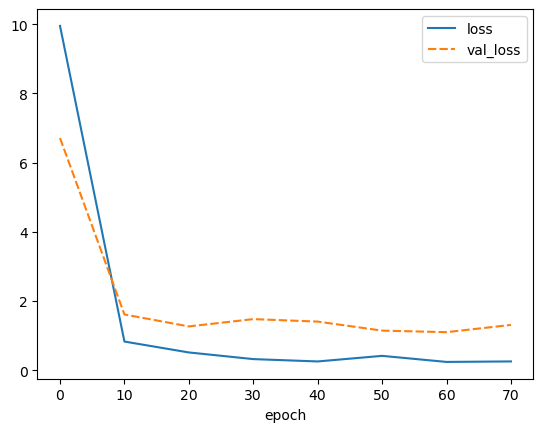

best weights loaded


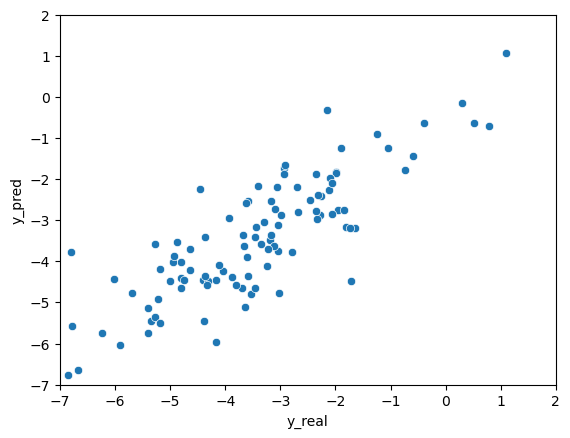

elapsed time: 18.396114826202393
run: 33
{'hidden_feats': [256], 'predictor_hidden_feats': 256, 'apply_scaffold_split_list': True}
GCNPredictor(
  (gnn): GCN(
    (gnn_layers): ModuleList(
      (0): GCNLayer(
        (graph_conv): GraphConv(in=74, out=256, normalization=none, activation=<function relu at 0x0000015C98418DC0>)
        (dropout): Dropout(p=0.0, inplace=False)
        (res_connection): Linear(in_features=74, out_features=256, bias=True)
        (bn_layer): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
    )
  )
  (readout): WeightedSumAndMax(
    (weight_and_sum): WeightAndSum(
      (atom_weighting): Sequential(
        (0): Linear(in_features=256, out_features=1, bias=True)
        (1): Sigmoid()
      )
    )
  )
  (predict): MLPPredictor(
    (predict): Sequential(
      (0): Dropout(p=0.0, inplace=False)
      (1): Linear(in_features=512, out_features=256, bias=True)
      (2): ReLU()
      (3): BatchNorm1d(256, eps=1e-05, m

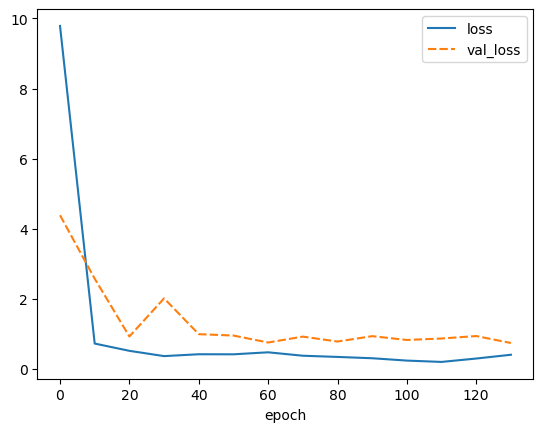

best weights loaded


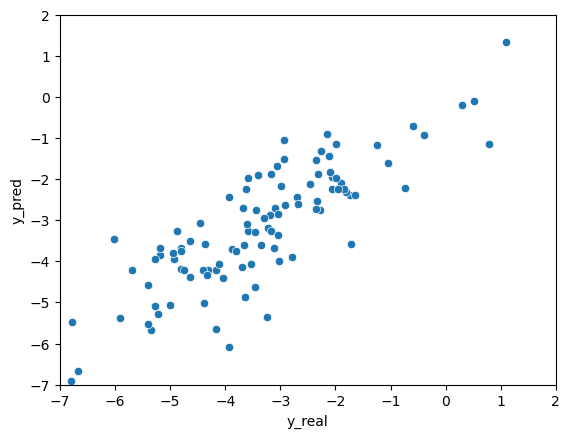

elapsed time: 32.34506916999817
run: 34
{'hidden_feats': [256], 'predictor_hidden_feats': 512, 'apply_scaffold_split_list': True}
GCNPredictor(
  (gnn): GCN(
    (gnn_layers): ModuleList(
      (0): GCNLayer(
        (graph_conv): GraphConv(in=74, out=256, normalization=none, activation=<function relu at 0x0000015C98418DC0>)
        (dropout): Dropout(p=0.0, inplace=False)
        (res_connection): Linear(in_features=74, out_features=256, bias=True)
        (bn_layer): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
    )
  )
  (readout): WeightedSumAndMax(
    (weight_and_sum): WeightAndSum(
      (atom_weighting): Sequential(
        (0): Linear(in_features=256, out_features=1, bias=True)
        (1): Sigmoid()
      )
    )
  )
  (predict): MLPPredictor(
    (predict): Sequential(
      (0): Dropout(p=0.0, inplace=False)
      (1): Linear(in_features=512, out_features=512, bias=True)
      (2): ReLU()
      (3): BatchNorm1d(512, eps=1e-05, mo

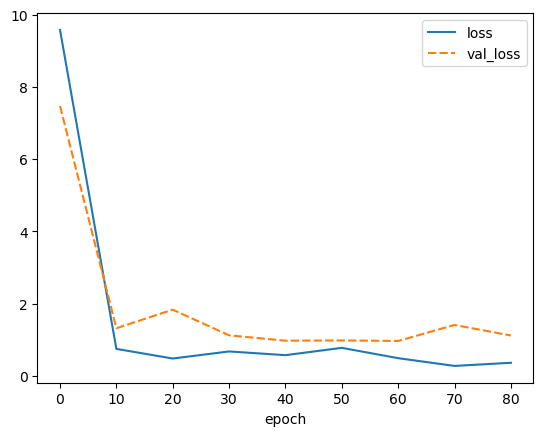

best weights loaded


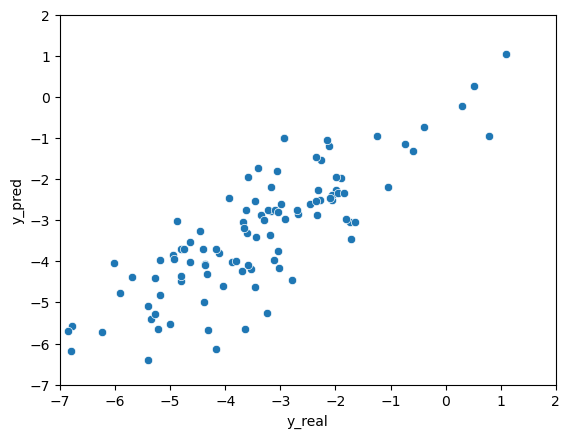

elapsed time: 21.695222854614258
run: 35
{'hidden_feats': [256], 'predictor_hidden_feats': 1024, 'apply_scaffold_split_list': True}
GCNPredictor(
  (gnn): GCN(
    (gnn_layers): ModuleList(
      (0): GCNLayer(
        (graph_conv): GraphConv(in=74, out=256, normalization=none, activation=<function relu at 0x0000015C98418DC0>)
        (dropout): Dropout(p=0.0, inplace=False)
        (res_connection): Linear(in_features=74, out_features=256, bias=True)
        (bn_layer): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
    )
  )
  (readout): WeightedSumAndMax(
    (weight_and_sum): WeightAndSum(
      (atom_weighting): Sequential(
        (0): Linear(in_features=256, out_features=1, bias=True)
        (1): Sigmoid()
      )
    )
  )
  (predict): MLPPredictor(
    (predict): Sequential(
      (0): Dropout(p=0.0, inplace=False)
      (1): Linear(in_features=512, out_features=1024, bias=True)
      (2): ReLU()
      (3): BatchNorm1d(1024, eps=1e-05

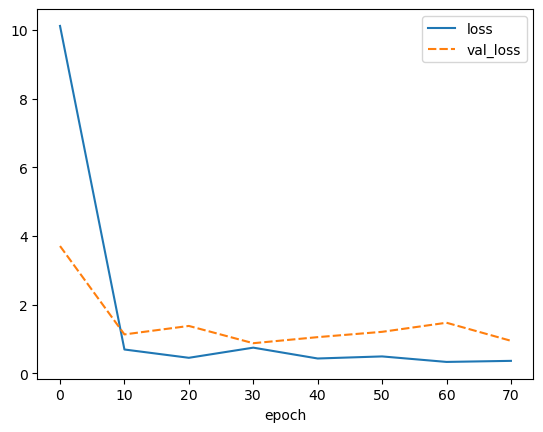

best weights loaded


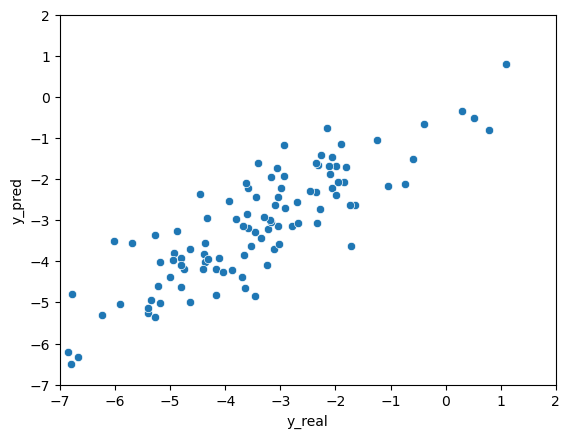

elapsed time: 19.781437397003174
run: 36
{'hidden_feats': [256, 256], 'predictor_hidden_feats': 128, 'apply_scaffold_split_list': True}
GCNPredictor(
  (gnn): GCN(
    (gnn_layers): ModuleList(
      (0): GCNLayer(
        (graph_conv): GraphConv(in=74, out=256, normalization=none, activation=<function relu at 0x0000015C98418DC0>)
        (dropout): Dropout(p=0.0, inplace=False)
        (res_connection): Linear(in_features=74, out_features=256, bias=True)
        (bn_layer): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): GCNLayer(
        (graph_conv): GraphConv(in=256, out=256, normalization=none, activation=<function relu at 0x0000015C98418DC0>)
        (dropout): Dropout(p=0.0, inplace=False)
        (res_connection): Linear(in_features=256, out_features=256, bias=True)
        (bn_layer): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
    )
  )
  (readout): WeightedSumAndMax(
    (weight_

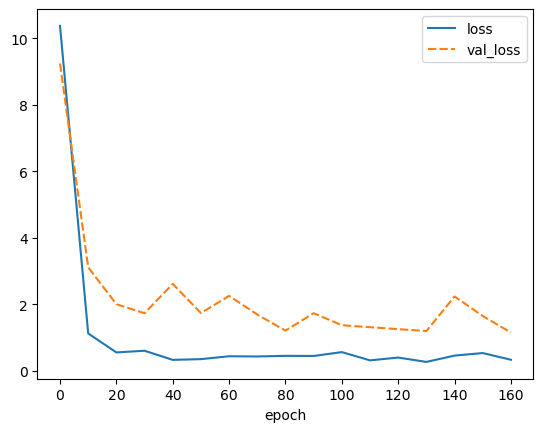

best weights loaded


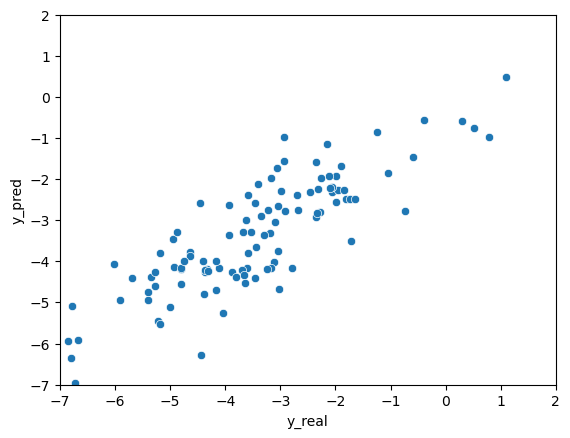

elapsed time: 52.104366302490234
run: 37
{'hidden_feats': [256, 256], 'predictor_hidden_feats': 256, 'apply_scaffold_split_list': True}
GCNPredictor(
  (gnn): GCN(
    (gnn_layers): ModuleList(
      (0): GCNLayer(
        (graph_conv): GraphConv(in=74, out=256, normalization=none, activation=<function relu at 0x0000015C98418DC0>)
        (dropout): Dropout(p=0.0, inplace=False)
        (res_connection): Linear(in_features=74, out_features=256, bias=True)
        (bn_layer): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): GCNLayer(
        (graph_conv): GraphConv(in=256, out=256, normalization=none, activation=<function relu at 0x0000015C98418DC0>)
        (dropout): Dropout(p=0.0, inplace=False)
        (res_connection): Linear(in_features=256, out_features=256, bias=True)
        (bn_layer): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
    )
  )
  (readout): WeightedSumAndMax(
    (weight_

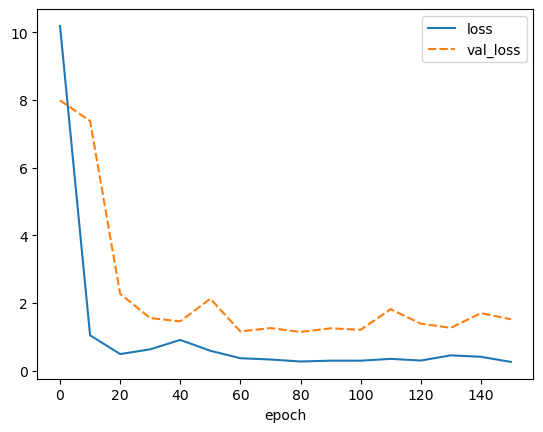

best weights loaded


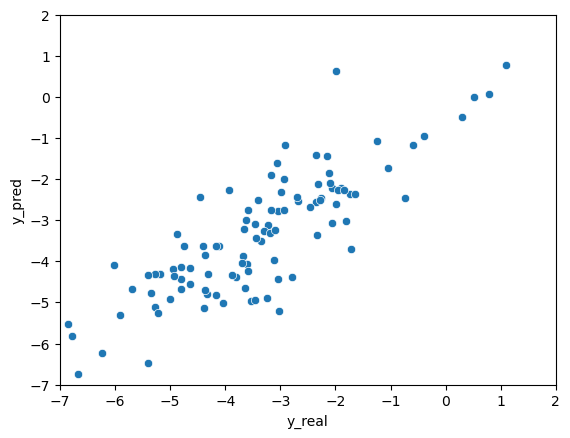

elapsed time: 50.06304931640625
run: 38
{'hidden_feats': [256, 256], 'predictor_hidden_feats': 512, 'apply_scaffold_split_list': True}
GCNPredictor(
  (gnn): GCN(
    (gnn_layers): ModuleList(
      (0): GCNLayer(
        (graph_conv): GraphConv(in=74, out=256, normalization=none, activation=<function relu at 0x0000015C98418DC0>)
        (dropout): Dropout(p=0.0, inplace=False)
        (res_connection): Linear(in_features=74, out_features=256, bias=True)
        (bn_layer): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): GCNLayer(
        (graph_conv): GraphConv(in=256, out=256, normalization=none, activation=<function relu at 0x0000015C98418DC0>)
        (dropout): Dropout(p=0.0, inplace=False)
        (res_connection): Linear(in_features=256, out_features=256, bias=True)
        (bn_layer): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
    )
  )
  (readout): WeightedSumAndMax(
    (weight_a

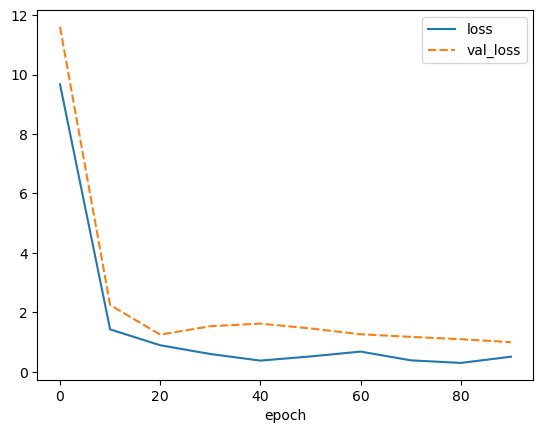

best weights loaded


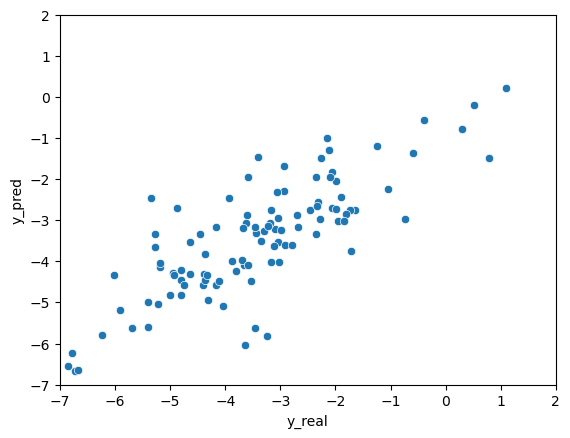

elapsed time: 32.24044728279114
run: 39
{'hidden_feats': [256, 256], 'predictor_hidden_feats': 1024, 'apply_scaffold_split_list': True}
GCNPredictor(
  (gnn): GCN(
    (gnn_layers): ModuleList(
      (0): GCNLayer(
        (graph_conv): GraphConv(in=74, out=256, normalization=none, activation=<function relu at 0x0000015C98418DC0>)
        (dropout): Dropout(p=0.0, inplace=False)
        (res_connection): Linear(in_features=74, out_features=256, bias=True)
        (bn_layer): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): GCNLayer(
        (graph_conv): GraphConv(in=256, out=256, normalization=none, activation=<function relu at 0x0000015C98418DC0>)
        (dropout): Dropout(p=0.0, inplace=False)
        (res_connection): Linear(in_features=256, out_features=256, bias=True)
        (bn_layer): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
    )
  )
  (readout): WeightedSumAndMax(
    (weight_

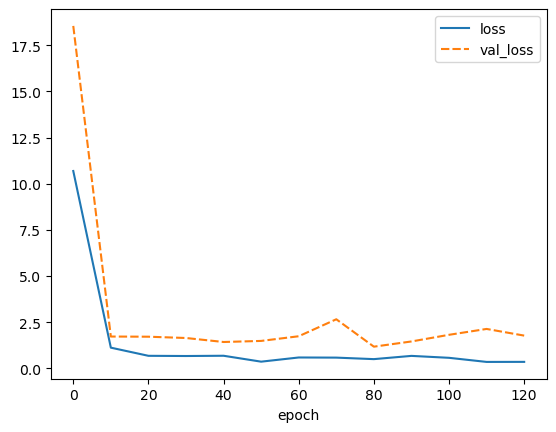

best weights loaded


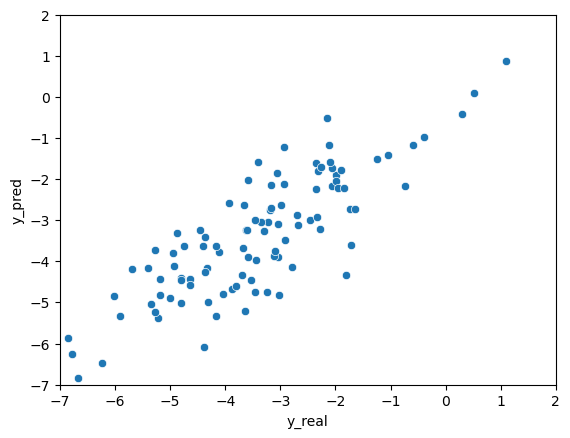

elapsed time: 44.8725311756134
run: 40
{'hidden_feats': [256, 256, 256], 'predictor_hidden_feats': 128, 'apply_scaffold_split_list': True}
GCNPredictor(
  (gnn): GCN(
    (gnn_layers): ModuleList(
      (0): GCNLayer(
        (graph_conv): GraphConv(in=74, out=256, normalization=none, activation=<function relu at 0x0000015C98418DC0>)
        (dropout): Dropout(p=0.0, inplace=False)
        (res_connection): Linear(in_features=74, out_features=256, bias=True)
        (bn_layer): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1-2): 2 x GCNLayer(
        (graph_conv): GraphConv(in=256, out=256, normalization=none, activation=<function relu at 0x0000015C98418DC0>)
        (dropout): Dropout(p=0.0, inplace=False)
        (res_connection): Linear(in_features=256, out_features=256, bias=True)
        (bn_layer): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
    )
  )
  (readout): WeightedSumAndMax(
   

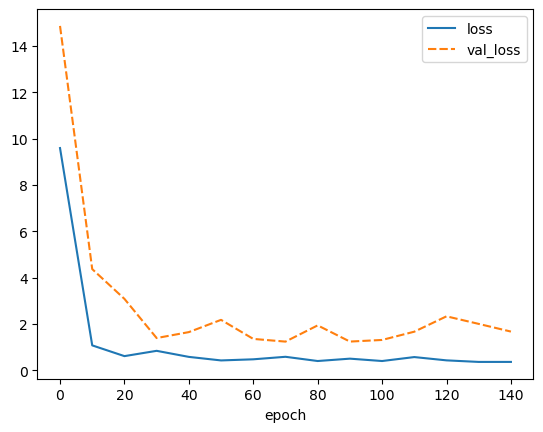

best weights loaded


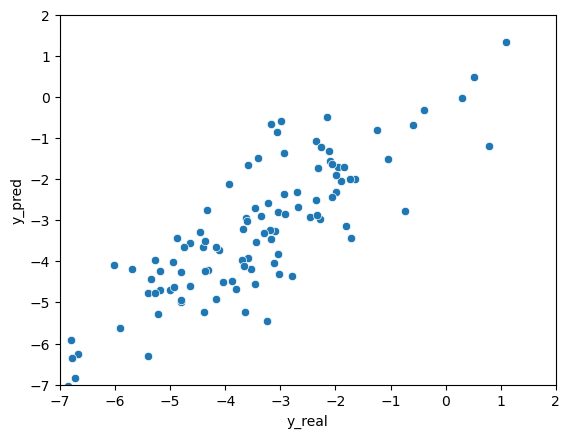

elapsed time: 54.77510476112366
run: 41
{'hidden_feats': [256, 256, 256], 'predictor_hidden_feats': 256, 'apply_scaffold_split_list': True}
GCNPredictor(
  (gnn): GCN(
    (gnn_layers): ModuleList(
      (0): GCNLayer(
        (graph_conv): GraphConv(in=74, out=256, normalization=none, activation=<function relu at 0x0000015C98418DC0>)
        (dropout): Dropout(p=0.0, inplace=False)
        (res_connection): Linear(in_features=74, out_features=256, bias=True)
        (bn_layer): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1-2): 2 x GCNLayer(
        (graph_conv): GraphConv(in=256, out=256, normalization=none, activation=<function relu at 0x0000015C98418DC0>)
        (dropout): Dropout(p=0.0, inplace=False)
        (res_connection): Linear(in_features=256, out_features=256, bias=True)
        (bn_layer): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
    )
  )
  (readout): WeightedSumAndMax(
  

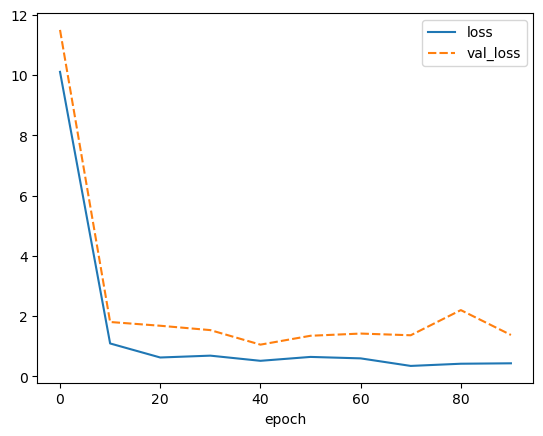

best weights loaded


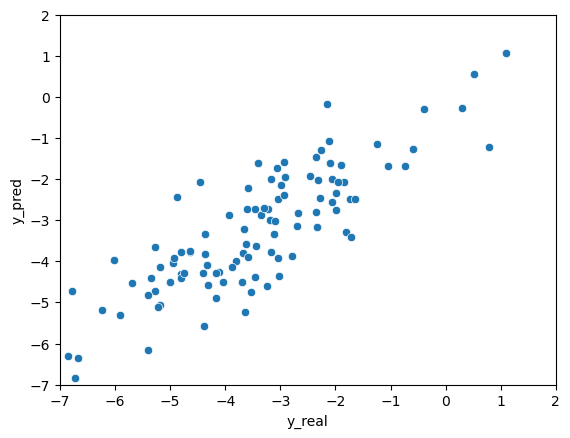

elapsed time: 37.050759077072144
run: 42
{'hidden_feats': [256, 256, 256], 'predictor_hidden_feats': 512, 'apply_scaffold_split_list': True}
GCNPredictor(
  (gnn): GCN(
    (gnn_layers): ModuleList(
      (0): GCNLayer(
        (graph_conv): GraphConv(in=74, out=256, normalization=none, activation=<function relu at 0x0000015C98418DC0>)
        (dropout): Dropout(p=0.0, inplace=False)
        (res_connection): Linear(in_features=74, out_features=256, bias=True)
        (bn_layer): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1-2): 2 x GCNLayer(
        (graph_conv): GraphConv(in=256, out=256, normalization=none, activation=<function relu at 0x0000015C98418DC0>)
        (dropout): Dropout(p=0.0, inplace=False)
        (res_connection): Linear(in_features=256, out_features=256, bias=True)
        (bn_layer): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
    )
  )
  (readout): WeightedSumAndMax(
 

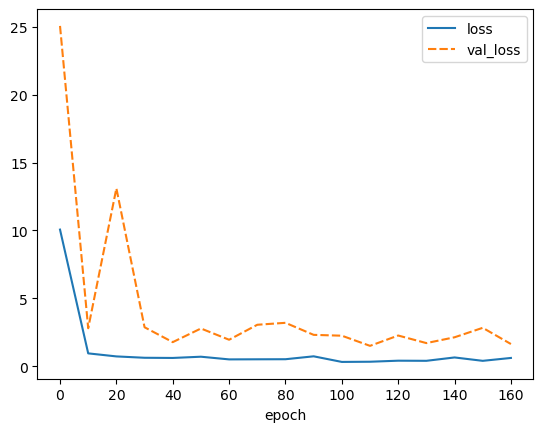

best weights loaded


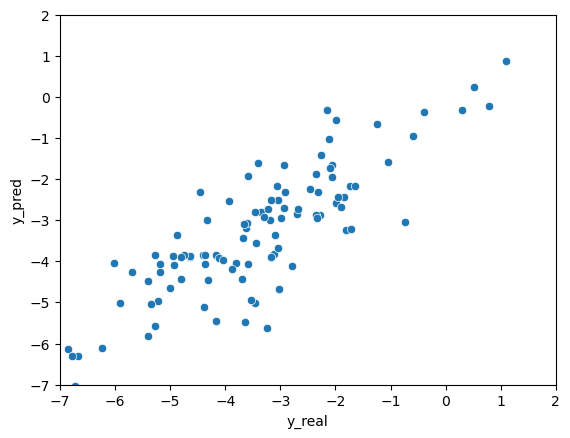

elapsed time: 64.88649988174438
run: 43
{'hidden_feats': [256, 256, 256], 'predictor_hidden_feats': 1024, 'apply_scaffold_split_list': True}
GCNPredictor(
  (gnn): GCN(
    (gnn_layers): ModuleList(
      (0): GCNLayer(
        (graph_conv): GraphConv(in=74, out=256, normalization=none, activation=<function relu at 0x0000015C98418DC0>)
        (dropout): Dropout(p=0.0, inplace=False)
        (res_connection): Linear(in_features=74, out_features=256, bias=True)
        (bn_layer): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1-2): 2 x GCNLayer(
        (graph_conv): GraphConv(in=256, out=256, normalization=none, activation=<function relu at 0x0000015C98418DC0>)
        (dropout): Dropout(p=0.0, inplace=False)
        (res_connection): Linear(in_features=256, out_features=256, bias=True)
        (bn_layer): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
    )
  )
  (readout): WeightedSumAndMax(
 

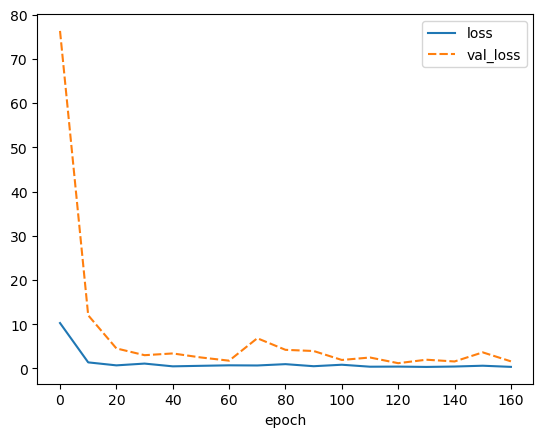

best weights loaded


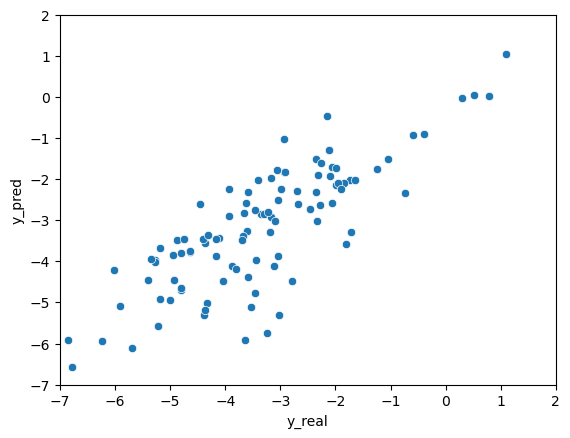

elapsed time: 67.0508987903595
run: 44
{'hidden_feats': [256, 256, 256, 256], 'predictor_hidden_feats': 128, 'apply_scaffold_split_list': True}
GCNPredictor(
  (gnn): GCN(
    (gnn_layers): ModuleList(
      (0): GCNLayer(
        (graph_conv): GraphConv(in=74, out=256, normalization=none, activation=<function relu at 0x0000015C98418DC0>)
        (dropout): Dropout(p=0.0, inplace=False)
        (res_connection): Linear(in_features=74, out_features=256, bias=True)
        (bn_layer): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1-3): 3 x GCNLayer(
        (graph_conv): GraphConv(in=256, out=256, normalization=none, activation=<function relu at 0x0000015C98418DC0>)
        (dropout): Dropout(p=0.0, inplace=False)
        (res_connection): Linear(in_features=256, out_features=256, bias=True)
        (bn_layer): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
    )
  )
  (readout): WeightedSumAndMax

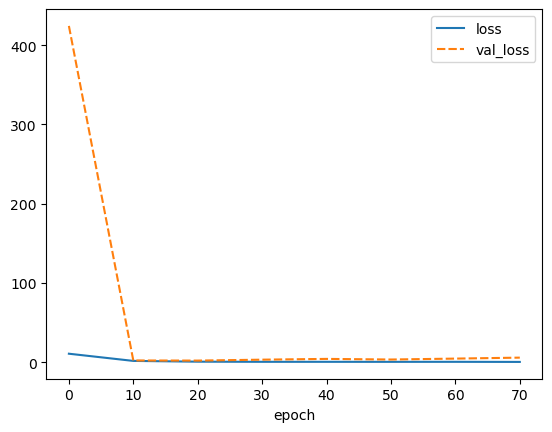

best weights loaded


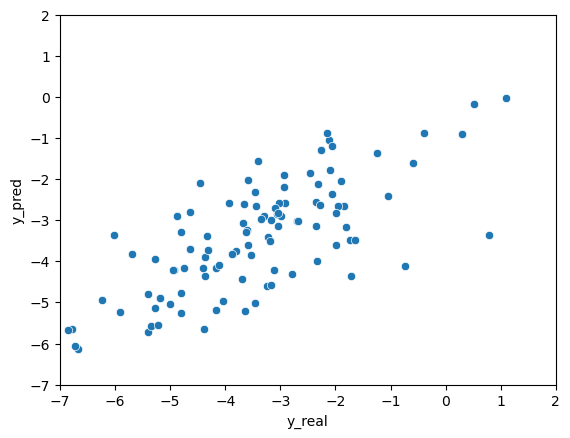

elapsed time: 33.9969642162323
run: 45
{'hidden_feats': [256, 256, 256, 256], 'predictor_hidden_feats': 256, 'apply_scaffold_split_list': True}
GCNPredictor(
  (gnn): GCN(
    (gnn_layers): ModuleList(
      (0): GCNLayer(
        (graph_conv): GraphConv(in=74, out=256, normalization=none, activation=<function relu at 0x0000015C98418DC0>)
        (dropout): Dropout(p=0.0, inplace=False)
        (res_connection): Linear(in_features=74, out_features=256, bias=True)
        (bn_layer): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1-3): 3 x GCNLayer(
        (graph_conv): GraphConv(in=256, out=256, normalization=none, activation=<function relu at 0x0000015C98418DC0>)
        (dropout): Dropout(p=0.0, inplace=False)
        (res_connection): Linear(in_features=256, out_features=256, bias=True)
        (bn_layer): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
    )
  )
  (readout): WeightedSumAndMax

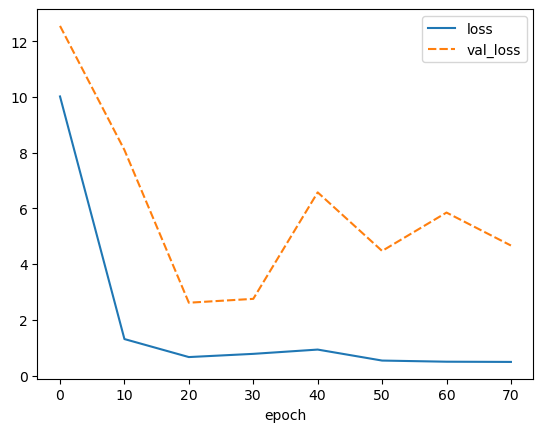

best weights loaded


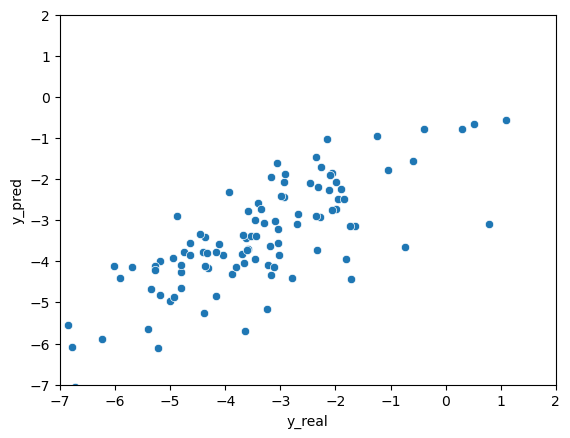

elapsed time: 31.426615238189697
run: 46
{'hidden_feats': [256, 256, 256, 256], 'predictor_hidden_feats': 512, 'apply_scaffold_split_list': True}
GCNPredictor(
  (gnn): GCN(
    (gnn_layers): ModuleList(
      (0): GCNLayer(
        (graph_conv): GraphConv(in=74, out=256, normalization=none, activation=<function relu at 0x0000015C98418DC0>)
        (dropout): Dropout(p=0.0, inplace=False)
        (res_connection): Linear(in_features=74, out_features=256, bias=True)
        (bn_layer): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1-3): 3 x GCNLayer(
        (graph_conv): GraphConv(in=256, out=256, normalization=none, activation=<function relu at 0x0000015C98418DC0>)
        (dropout): Dropout(p=0.0, inplace=False)
        (res_connection): Linear(in_features=256, out_features=256, bias=True)
        (bn_layer): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
    )
  )
  (readout): WeightedSumAndM

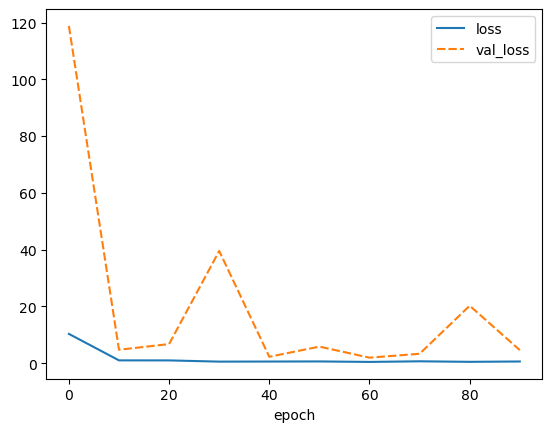

best weights loaded


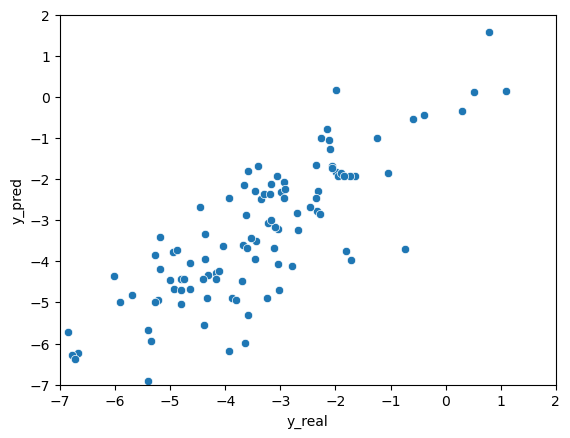

elapsed time: 44.829387187957764
run: 47
{'hidden_feats': [256, 256, 256, 256], 'predictor_hidden_feats': 1024, 'apply_scaffold_split_list': True}
GCNPredictor(
  (gnn): GCN(
    (gnn_layers): ModuleList(
      (0): GCNLayer(
        (graph_conv): GraphConv(in=74, out=256, normalization=none, activation=<function relu at 0x0000015C98418DC0>)
        (dropout): Dropout(p=0.0, inplace=False)
        (res_connection): Linear(in_features=74, out_features=256, bias=True)
        (bn_layer): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1-3): 3 x GCNLayer(
        (graph_conv): GraphConv(in=256, out=256, normalization=none, activation=<function relu at 0x0000015C98418DC0>)
        (dropout): Dropout(p=0.0, inplace=False)
        (res_connection): Linear(in_features=256, out_features=256, bias=True)
        (bn_layer): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
    )
  )
  (readout): WeightedSumAnd

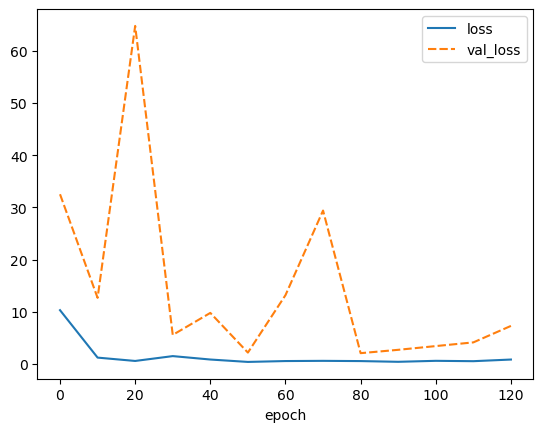

best weights loaded


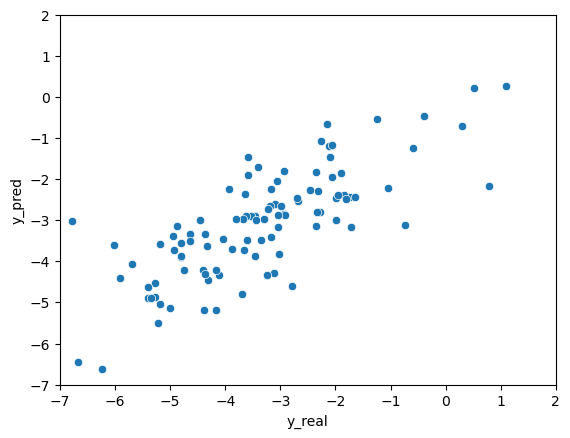

elapsed time: 59.71824836730957
run: 48
{'hidden_feats': [512], 'predictor_hidden_feats': 128, 'apply_scaffold_split_list': True}
GCNPredictor(
  (gnn): GCN(
    (gnn_layers): ModuleList(
      (0): GCNLayer(
        (graph_conv): GraphConv(in=74, out=512, normalization=none, activation=<function relu at 0x0000015C98418DC0>)
        (dropout): Dropout(p=0.0, inplace=False)
        (res_connection): Linear(in_features=74, out_features=512, bias=True)
        (bn_layer): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
    )
  )
  (readout): WeightedSumAndMax(
    (weight_and_sum): WeightAndSum(
      (atom_weighting): Sequential(
        (0): Linear(in_features=512, out_features=1, bias=True)
        (1): Sigmoid()
      )
    )
  )
  (predict): MLPPredictor(
    (predict): Sequential(
      (0): Dropout(p=0.0, inplace=False)
      (1): Linear(in_features=1024, out_features=128, bias=True)
      (2): ReLU()
      (3): BatchNorm1d(128, eps=1e-05, m

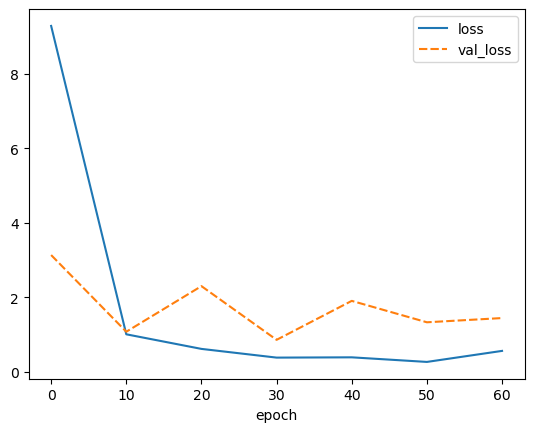

best weights loaded


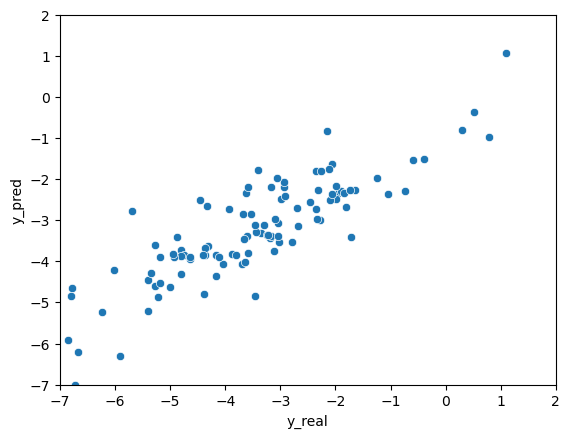

elapsed time: 18.440919876098633
run: 49
{'hidden_feats': [512], 'predictor_hidden_feats': 256, 'apply_scaffold_split_list': True}
GCNPredictor(
  (gnn): GCN(
    (gnn_layers): ModuleList(
      (0): GCNLayer(
        (graph_conv): GraphConv(in=74, out=512, normalization=none, activation=<function relu at 0x0000015C98418DC0>)
        (dropout): Dropout(p=0.0, inplace=False)
        (res_connection): Linear(in_features=74, out_features=512, bias=True)
        (bn_layer): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
    )
  )
  (readout): WeightedSumAndMax(
    (weight_and_sum): WeightAndSum(
      (atom_weighting): Sequential(
        (0): Linear(in_features=512, out_features=1, bias=True)
        (1): Sigmoid()
      )
    )
  )
  (predict): MLPPredictor(
    (predict): Sequential(
      (0): Dropout(p=0.0, inplace=False)
      (1): Linear(in_features=1024, out_features=256, bias=True)
      (2): ReLU()
      (3): BatchNorm1d(256, eps=1e-05, 

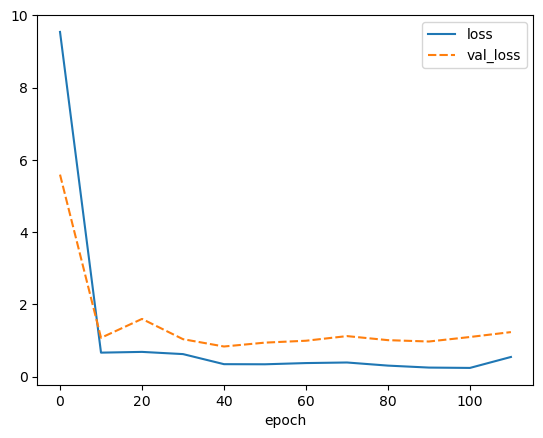

best weights loaded


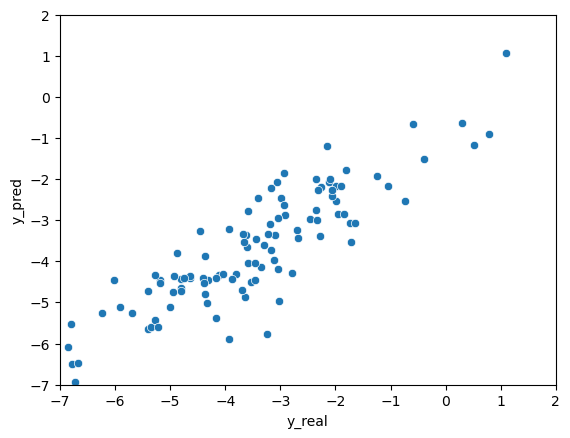

elapsed time: 31.011533737182617
run: 50
{'hidden_feats': [512], 'predictor_hidden_feats': 512, 'apply_scaffold_split_list': True}
GCNPredictor(
  (gnn): GCN(
    (gnn_layers): ModuleList(
      (0): GCNLayer(
        (graph_conv): GraphConv(in=74, out=512, normalization=none, activation=<function relu at 0x0000015C98418DC0>)
        (dropout): Dropout(p=0.0, inplace=False)
        (res_connection): Linear(in_features=74, out_features=512, bias=True)
        (bn_layer): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
    )
  )
  (readout): WeightedSumAndMax(
    (weight_and_sum): WeightAndSum(
      (atom_weighting): Sequential(
        (0): Linear(in_features=512, out_features=1, bias=True)
        (1): Sigmoid()
      )
    )
  )
  (predict): MLPPredictor(
    (predict): Sequential(
      (0): Dropout(p=0.0, inplace=False)
      (1): Linear(in_features=1024, out_features=512, bias=True)
      (2): ReLU()
      (3): BatchNorm1d(512, eps=1e-05, 

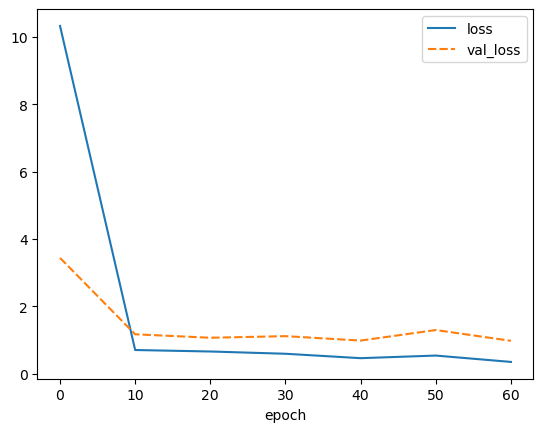

best weights loaded


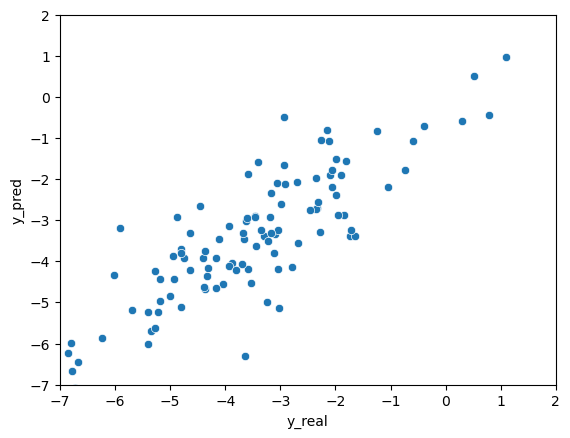

elapsed time: 19.6031813621521
run: 51
{'hidden_feats': [512], 'predictor_hidden_feats': 1024, 'apply_scaffold_split_list': True}
GCNPredictor(
  (gnn): GCN(
    (gnn_layers): ModuleList(
      (0): GCNLayer(
        (graph_conv): GraphConv(in=74, out=512, normalization=none, activation=<function relu at 0x0000015C98418DC0>)
        (dropout): Dropout(p=0.0, inplace=False)
        (res_connection): Linear(in_features=74, out_features=512, bias=True)
        (bn_layer): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
    )
  )
  (readout): WeightedSumAndMax(
    (weight_and_sum): WeightAndSum(
      (atom_weighting): Sequential(
        (0): Linear(in_features=512, out_features=1, bias=True)
        (1): Sigmoid()
      )
    )
  )
  (predict): MLPPredictor(
    (predict): Sequential(
      (0): Dropout(p=0.0, inplace=False)
      (1): Linear(in_features=1024, out_features=1024, bias=True)
      (2): ReLU()
      (3): BatchNorm1d(1024, eps=1e-05,

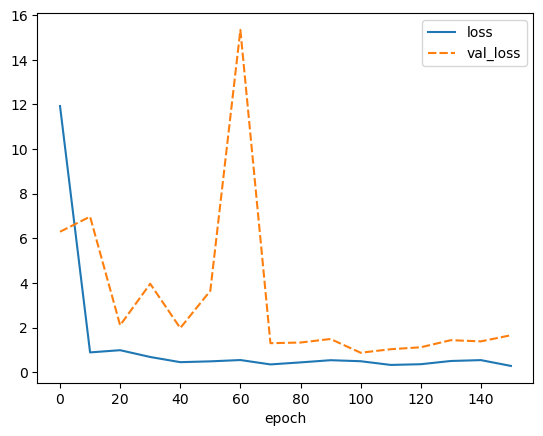

best weights loaded


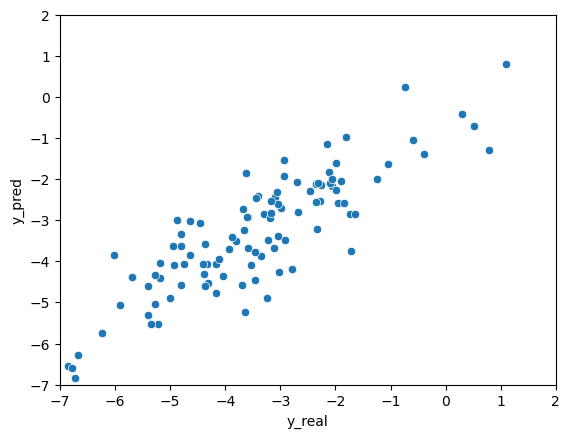

elapsed time: 48.931334495544434
run: 52
{'hidden_feats': [512, 512], 'predictor_hidden_feats': 128, 'apply_scaffold_split_list': True}
GCNPredictor(
  (gnn): GCN(
    (gnn_layers): ModuleList(
      (0): GCNLayer(
        (graph_conv): GraphConv(in=74, out=512, normalization=none, activation=<function relu at 0x0000015C98418DC0>)
        (dropout): Dropout(p=0.0, inplace=False)
        (res_connection): Linear(in_features=74, out_features=512, bias=True)
        (bn_layer): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): GCNLayer(
        (graph_conv): GraphConv(in=512, out=512, normalization=none, activation=<function relu at 0x0000015C98418DC0>)
        (dropout): Dropout(p=0.0, inplace=False)
        (res_connection): Linear(in_features=512, out_features=512, bias=True)
        (bn_layer): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
    )
  )
  (readout): WeightedSumAndMax(
    (weight_

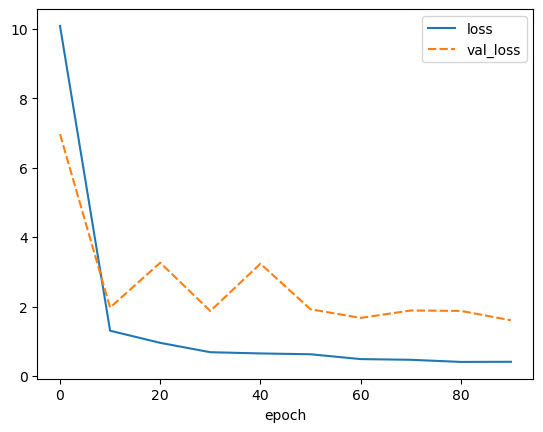

best weights loaded


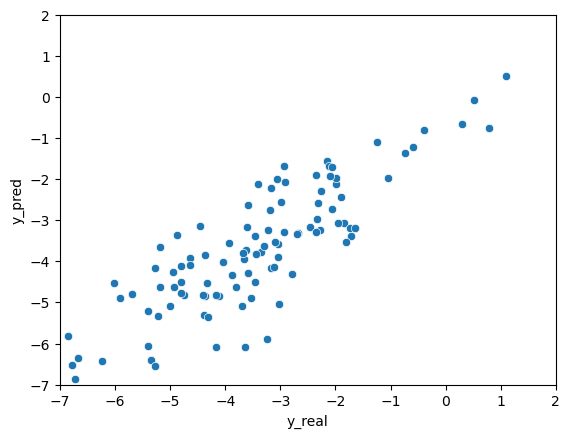

elapsed time: 39.23886036872864
run: 53
{'hidden_feats': [512, 512], 'predictor_hidden_feats': 256, 'apply_scaffold_split_list': True}
GCNPredictor(
  (gnn): GCN(
    (gnn_layers): ModuleList(
      (0): GCNLayer(
        (graph_conv): GraphConv(in=74, out=512, normalization=none, activation=<function relu at 0x0000015C98418DC0>)
        (dropout): Dropout(p=0.0, inplace=False)
        (res_connection): Linear(in_features=74, out_features=512, bias=True)
        (bn_layer): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): GCNLayer(
        (graph_conv): GraphConv(in=512, out=512, normalization=none, activation=<function relu at 0x0000015C98418DC0>)
        (dropout): Dropout(p=0.0, inplace=False)
        (res_connection): Linear(in_features=512, out_features=512, bias=True)
        (bn_layer): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
    )
  )
  (readout): WeightedSumAndMax(
    (weight_a

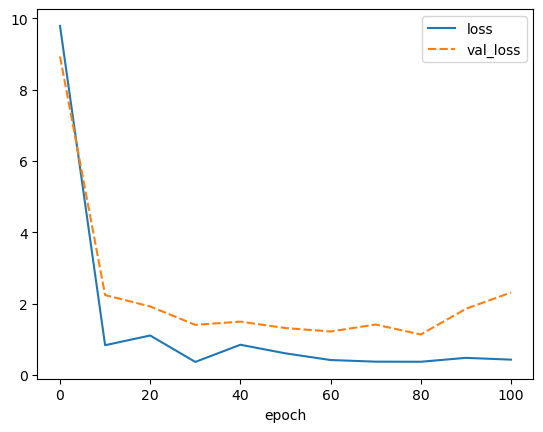

best weights loaded


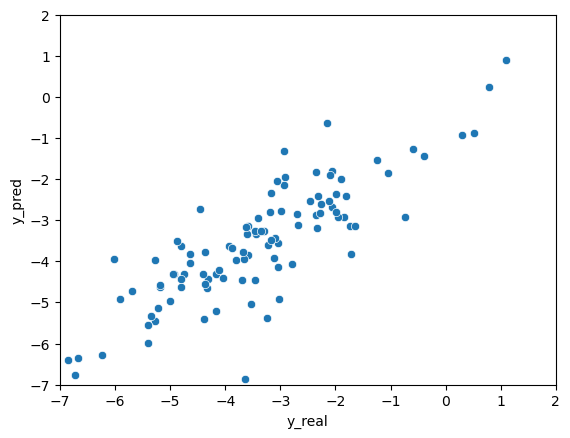

elapsed time: 43.46300745010376
run: 54
{'hidden_feats': [512, 512], 'predictor_hidden_feats': 512, 'apply_scaffold_split_list': True}
GCNPredictor(
  (gnn): GCN(
    (gnn_layers): ModuleList(
      (0): GCNLayer(
        (graph_conv): GraphConv(in=74, out=512, normalization=none, activation=<function relu at 0x0000015C98418DC0>)
        (dropout): Dropout(p=0.0, inplace=False)
        (res_connection): Linear(in_features=74, out_features=512, bias=True)
        (bn_layer): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): GCNLayer(
        (graph_conv): GraphConv(in=512, out=512, normalization=none, activation=<function relu at 0x0000015C98418DC0>)
        (dropout): Dropout(p=0.0, inplace=False)
        (res_connection): Linear(in_features=512, out_features=512, bias=True)
        (bn_layer): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
    )
  )
  (readout): WeightedSumAndMax(
    (weight_a

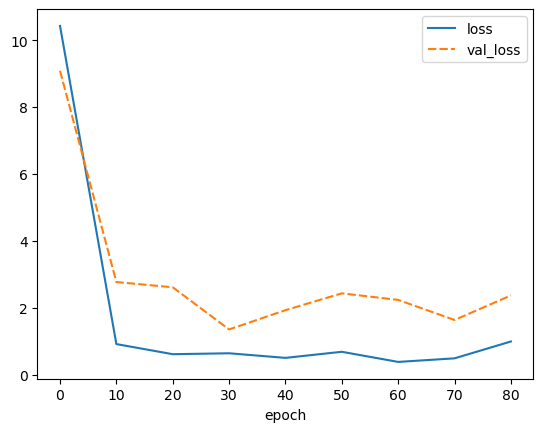

best weights loaded


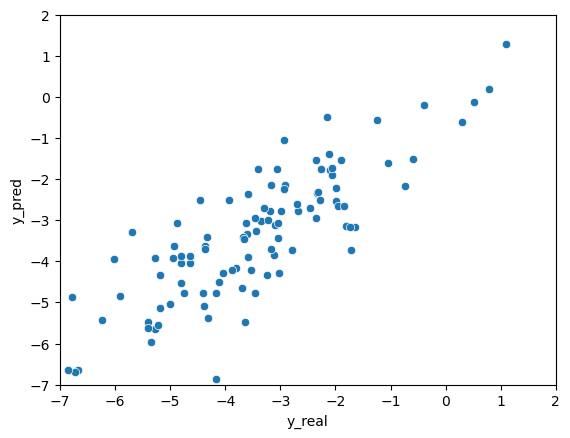

elapsed time: 35.577319383621216
run: 55
{'hidden_feats': [512, 512], 'predictor_hidden_feats': 1024, 'apply_scaffold_split_list': True}
GCNPredictor(
  (gnn): GCN(
    (gnn_layers): ModuleList(
      (0): GCNLayer(
        (graph_conv): GraphConv(in=74, out=512, normalization=none, activation=<function relu at 0x0000015C98418DC0>)
        (dropout): Dropout(p=0.0, inplace=False)
        (res_connection): Linear(in_features=74, out_features=512, bias=True)
        (bn_layer): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): GCNLayer(
        (graph_conv): GraphConv(in=512, out=512, normalization=none, activation=<function relu at 0x0000015C98418DC0>)
        (dropout): Dropout(p=0.0, inplace=False)
        (res_connection): Linear(in_features=512, out_features=512, bias=True)
        (bn_layer): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
    )
  )
  (readout): WeightedSumAndMax(
    (weight

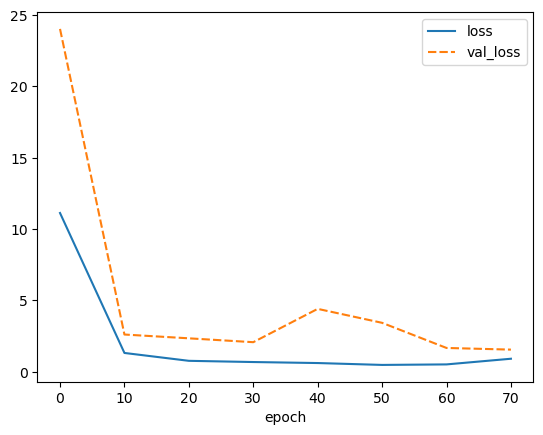

best weights loaded


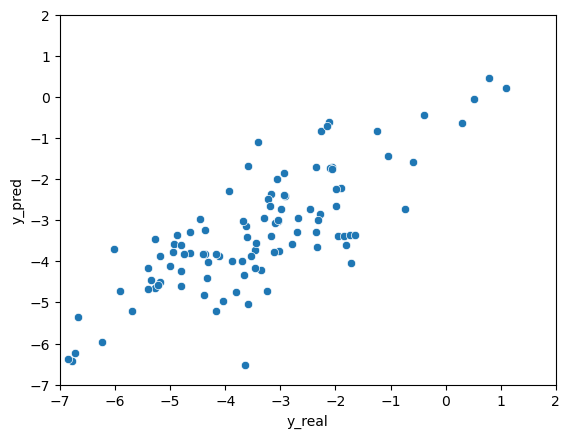

elapsed time: 34.680320501327515
run: 56
{'hidden_feats': [512, 512, 512], 'predictor_hidden_feats': 128, 'apply_scaffold_split_list': True}
GCNPredictor(
  (gnn): GCN(
    (gnn_layers): ModuleList(
      (0): GCNLayer(
        (graph_conv): GraphConv(in=74, out=512, normalization=none, activation=<function relu at 0x0000015C98418DC0>)
        (dropout): Dropout(p=0.0, inplace=False)
        (res_connection): Linear(in_features=74, out_features=512, bias=True)
        (bn_layer): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1-2): 2 x GCNLayer(
        (graph_conv): GraphConv(in=512, out=512, normalization=none, activation=<function relu at 0x0000015C98418DC0>)
        (dropout): Dropout(p=0.0, inplace=False)
        (res_connection): Linear(in_features=512, out_features=512, bias=True)
        (bn_layer): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
    )
  )
  (readout): WeightedSumAndMax(
 

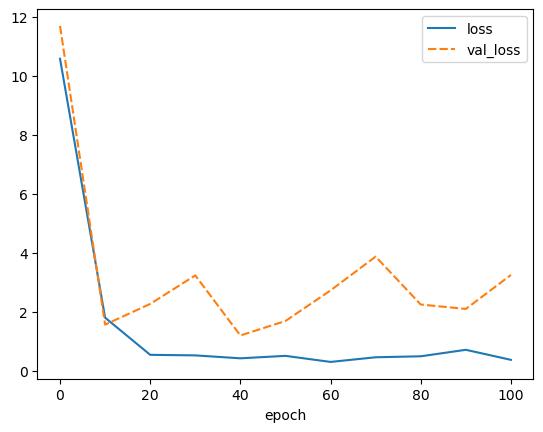

best weights loaded


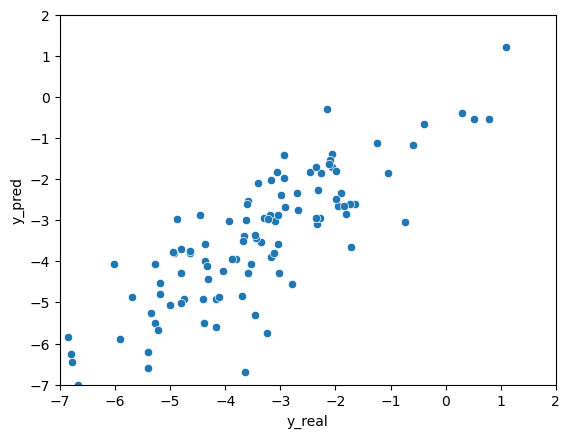

elapsed time: 51.694236755371094
run: 57
{'hidden_feats': [512, 512, 512], 'predictor_hidden_feats': 256, 'apply_scaffold_split_list': True}
GCNPredictor(
  (gnn): GCN(
    (gnn_layers): ModuleList(
      (0): GCNLayer(
        (graph_conv): GraphConv(in=74, out=512, normalization=none, activation=<function relu at 0x0000015C98418DC0>)
        (dropout): Dropout(p=0.0, inplace=False)
        (res_connection): Linear(in_features=74, out_features=512, bias=True)
        (bn_layer): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1-2): 2 x GCNLayer(
        (graph_conv): GraphConv(in=512, out=512, normalization=none, activation=<function relu at 0x0000015C98418DC0>)
        (dropout): Dropout(p=0.0, inplace=False)
        (res_connection): Linear(in_features=512, out_features=512, bias=True)
        (bn_layer): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
    )
  )
  (readout): WeightedSumAndMax(
 

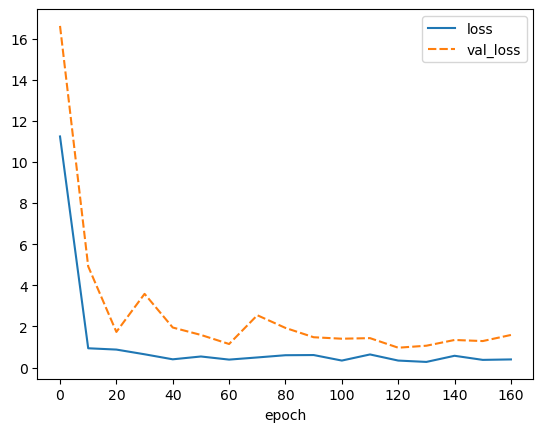

best weights loaded


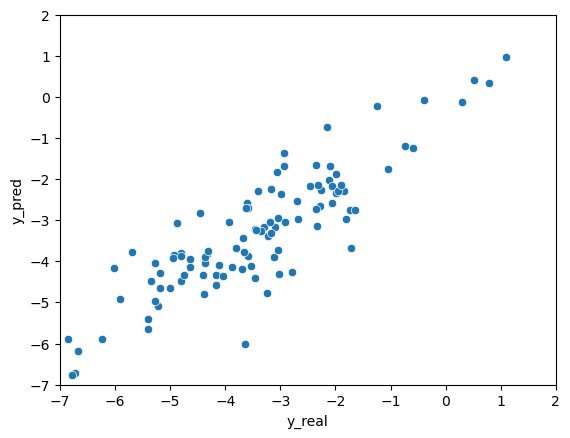

elapsed time: 85.60661578178406
run: 58
{'hidden_feats': [512, 512, 512], 'predictor_hidden_feats': 512, 'apply_scaffold_split_list': True}
GCNPredictor(
  (gnn): GCN(
    (gnn_layers): ModuleList(
      (0): GCNLayer(
        (graph_conv): GraphConv(in=74, out=512, normalization=none, activation=<function relu at 0x0000015C98418DC0>)
        (dropout): Dropout(p=0.0, inplace=False)
        (res_connection): Linear(in_features=74, out_features=512, bias=True)
        (bn_layer): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1-2): 2 x GCNLayer(
        (graph_conv): GraphConv(in=512, out=512, normalization=none, activation=<function relu at 0x0000015C98418DC0>)
        (dropout): Dropout(p=0.0, inplace=False)
        (res_connection): Linear(in_features=512, out_features=512, bias=True)
        (bn_layer): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
    )
  )
  (readout): WeightedSumAndMax(
  

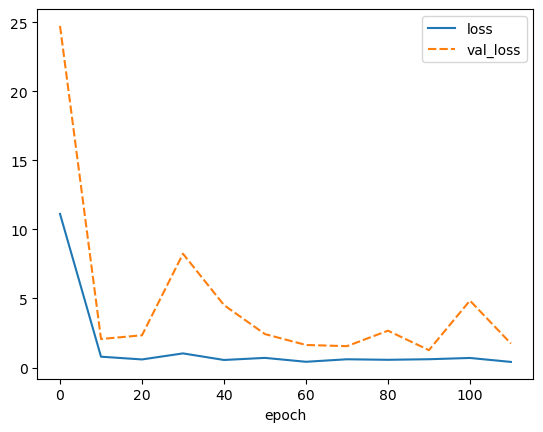

best weights loaded


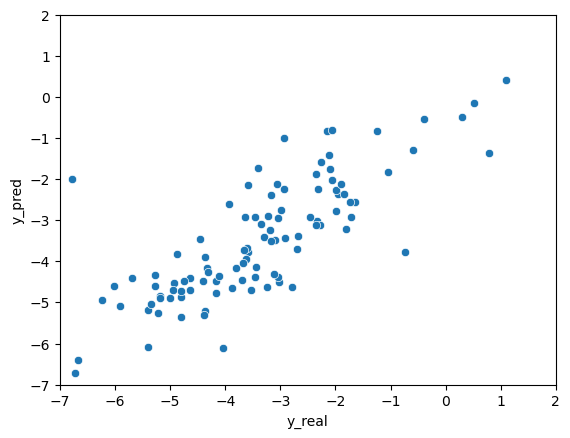

elapsed time: 56.36249828338623
run: 59
{'hidden_feats': [512, 512, 512], 'predictor_hidden_feats': 1024, 'apply_scaffold_split_list': True}
GCNPredictor(
  (gnn): GCN(
    (gnn_layers): ModuleList(
      (0): GCNLayer(
        (graph_conv): GraphConv(in=74, out=512, normalization=none, activation=<function relu at 0x0000015C98418DC0>)
        (dropout): Dropout(p=0.0, inplace=False)
        (res_connection): Linear(in_features=74, out_features=512, bias=True)
        (bn_layer): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1-2): 2 x GCNLayer(
        (graph_conv): GraphConv(in=512, out=512, normalization=none, activation=<function relu at 0x0000015C98418DC0>)
        (dropout): Dropout(p=0.0, inplace=False)
        (res_connection): Linear(in_features=512, out_features=512, bias=True)
        (bn_layer): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
    )
  )
  (readout): WeightedSumAndMax(
 

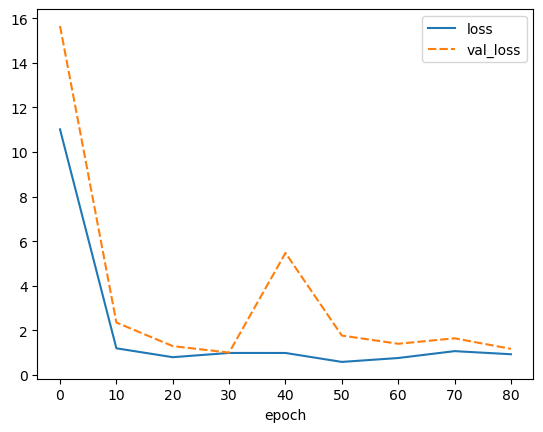

best weights loaded


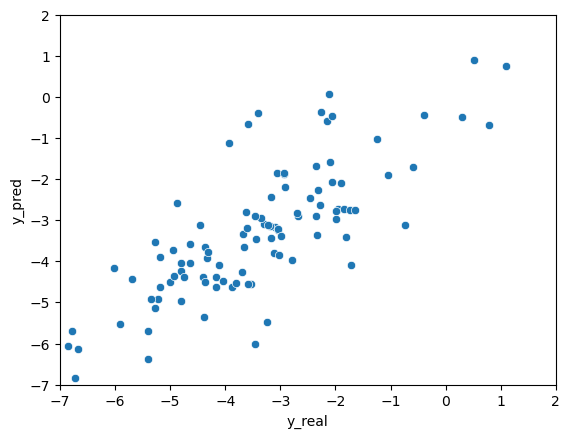

elapsed time: 34.85790491104126
run: 60
{'hidden_feats': [512, 512, 512, 512], 'predictor_hidden_feats': 128, 'apply_scaffold_split_list': True}
GCNPredictor(
  (gnn): GCN(
    (gnn_layers): ModuleList(
      (0): GCNLayer(
        (graph_conv): GraphConv(in=74, out=512, normalization=none, activation=<function relu at 0x0000015C98418DC0>)
        (dropout): Dropout(p=0.0, inplace=False)
        (res_connection): Linear(in_features=74, out_features=512, bias=True)
        (bn_layer): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1-3): 3 x GCNLayer(
        (graph_conv): GraphConv(in=512, out=512, normalization=none, activation=<function relu at 0x0000015C98418DC0>)
        (dropout): Dropout(p=0.0, inplace=False)
        (res_connection): Linear(in_features=512, out_features=512, bias=True)
        (bn_layer): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
    )
  )
  (readout): WeightedSumAndMa

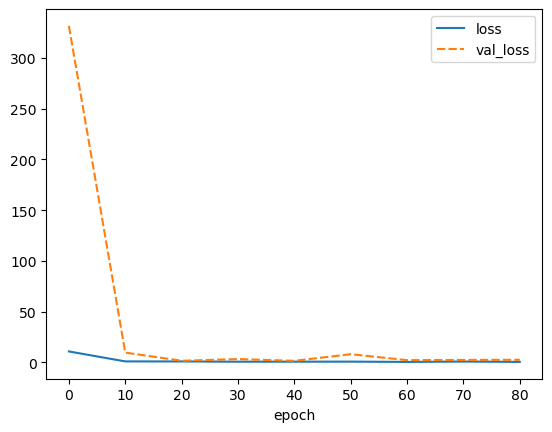

best weights loaded


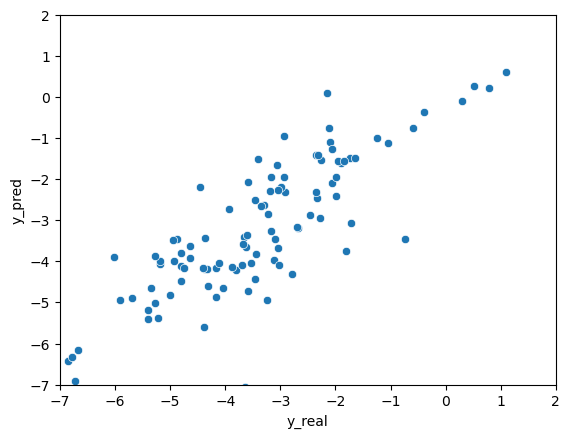

elapsed time: 41.89138865470886
run: 61
{'hidden_feats': [512, 512, 512, 512], 'predictor_hidden_feats': 256, 'apply_scaffold_split_list': True}
GCNPredictor(
  (gnn): GCN(
    (gnn_layers): ModuleList(
      (0): GCNLayer(
        (graph_conv): GraphConv(in=74, out=512, normalization=none, activation=<function relu at 0x0000015C98418DC0>)
        (dropout): Dropout(p=0.0, inplace=False)
        (res_connection): Linear(in_features=74, out_features=512, bias=True)
        (bn_layer): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1-3): 3 x GCNLayer(
        (graph_conv): GraphConv(in=512, out=512, normalization=none, activation=<function relu at 0x0000015C98418DC0>)
        (dropout): Dropout(p=0.0, inplace=False)
        (res_connection): Linear(in_features=512, out_features=512, bias=True)
        (bn_layer): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
    )
  )
  (readout): WeightedSumAndMa

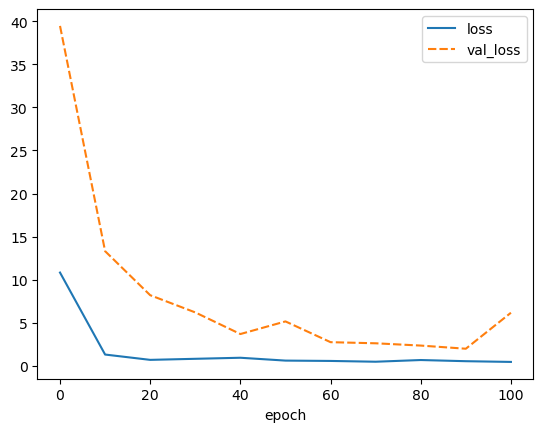

best weights loaded


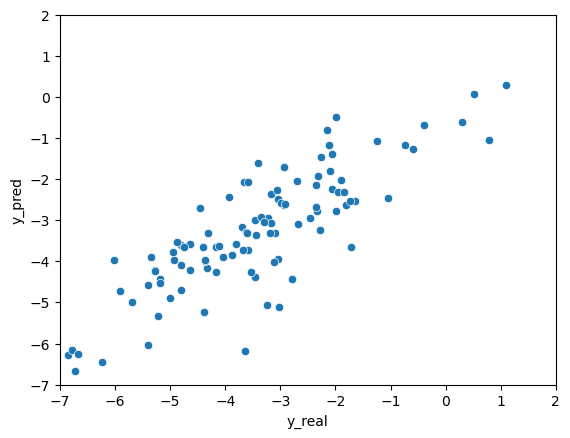

elapsed time: 50.38999032974243
run: 62
{'hidden_feats': [512, 512, 512, 512], 'predictor_hidden_feats': 512, 'apply_scaffold_split_list': True}
GCNPredictor(
  (gnn): GCN(
    (gnn_layers): ModuleList(
      (0): GCNLayer(
        (graph_conv): GraphConv(in=74, out=512, normalization=none, activation=<function relu at 0x0000015C98418DC0>)
        (dropout): Dropout(p=0.0, inplace=False)
        (res_connection): Linear(in_features=74, out_features=512, bias=True)
        (bn_layer): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1-3): 3 x GCNLayer(
        (graph_conv): GraphConv(in=512, out=512, normalization=none, activation=<function relu at 0x0000015C98418DC0>)
        (dropout): Dropout(p=0.0, inplace=False)
        (res_connection): Linear(in_features=512, out_features=512, bias=True)
        (bn_layer): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
    )
  )
  (readout): WeightedSumAndMa

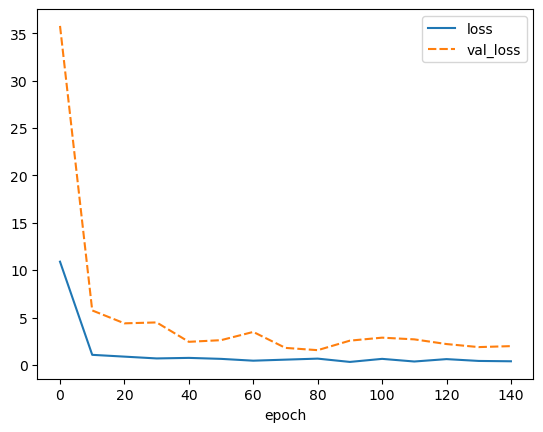

best weights loaded


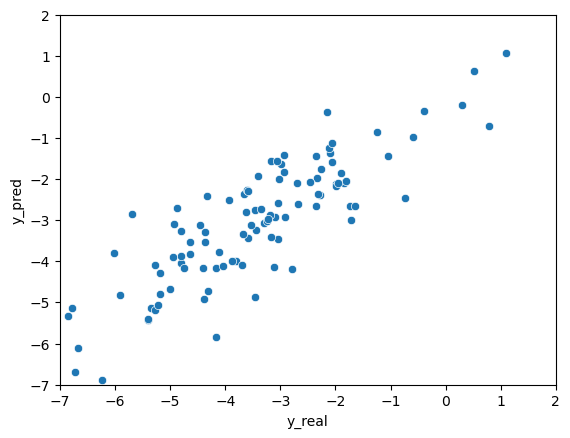

elapsed time: 66.70919060707092
run: 63
{'hidden_feats': [512, 512, 512, 512], 'predictor_hidden_feats': 1024, 'apply_scaffold_split_list': True}
GCNPredictor(
  (gnn): GCN(
    (gnn_layers): ModuleList(
      (0): GCNLayer(
        (graph_conv): GraphConv(in=74, out=512, normalization=none, activation=<function relu at 0x0000015C98418DC0>)
        (dropout): Dropout(p=0.0, inplace=False)
        (res_connection): Linear(in_features=74, out_features=512, bias=True)
        (bn_layer): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1-3): 3 x GCNLayer(
        (graph_conv): GraphConv(in=512, out=512, normalization=none, activation=<function relu at 0x0000015C98418DC0>)
        (dropout): Dropout(p=0.0, inplace=False)
        (res_connection): Linear(in_features=512, out_features=512, bias=True)
        (bn_layer): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
    )
  )
  (readout): WeightedSumAndM

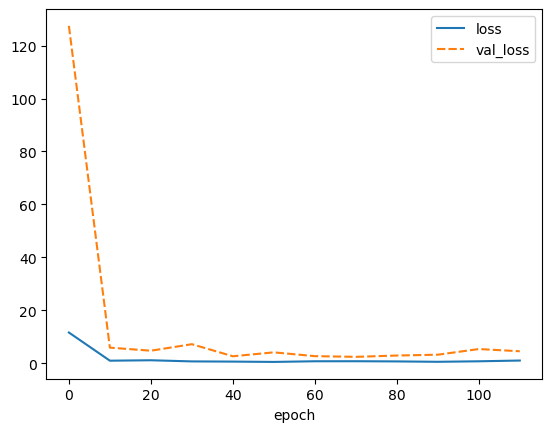

best weights loaded


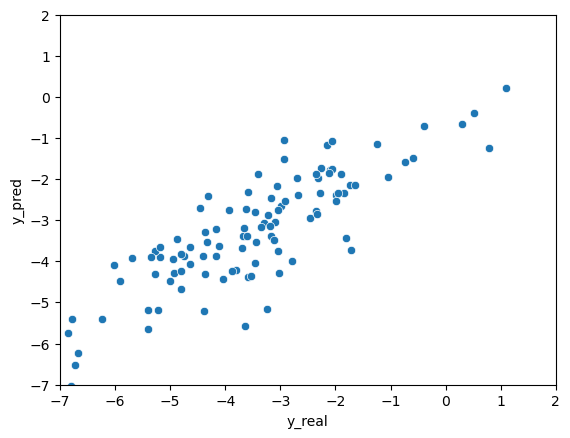

elapsed time: 57.57561230659485


In [18]:
import time

counter = 0
for combination in combinations:
    t0 = time.time()
    print(f"run: {counter}")
    counter = counter + 1
    
    #print(combination)
    combination_dict = dict(zip(keys, combination))
    print(combination_dict)
    

    apply_scaffold_split = combination_dict["apply_scaffold_split_list"]

    '''
    if not use_fingerprints:
        hidden_channels=combination_dict["hidden_channels_list"]
        gcn_layers=combination_dict["gcn_layers_list"]
        linear_sizes=combination_dict["linear_sizes_list"]
        aggregations=deepcopy(combination_dict["aggregations_list"])
    else:
        radius = combination_dict["radius"] 
        fpSize = combination_dict["fpSize"]
        linear_layers = combination_dict["linear_layers"] 
        create_count_fp = combination_dict["create_count_fp"] 
    '''
    hidden_feats = combination_dict["hidden_feats"]
    predictor_hidden_feats = combination_dict["predictor_hidden_feats"]

    
        

    #if not use_fingerprints:
    #model, device, optimizer, loss_fn = initialize_regression_model(input_dim=train_dataset.dataset[0].x.shape[-1], hidden_channels=hidden_channels, gcn_layers=gcn_layers, linear_sizes=linear_sizes, aggregations=aggregations, apply_random_aggregations=apply_random_aggregations, learning_rate=learning_rate)
    model, device, optimizer, loss_fn = initialize_dgl_regression_model(in_feats=train_dataset[0][0].ndata["h"].shape[-1], hidden_feats=hidden_feats, gnn_norm=None, activation=None, residual=None, batchnorm=None, dropout=None, classifier_dropout=0.0, n_tasks=1, predictor_hidden_feats=predictor_hidden_feats, predictor_dropout=0.0)

    #model, best_model_weights, losses, val_losses = regression_train(model, loader, test_loader, device, loss_fn, optimizer, log_time=10, max_epochs=1000, apply_early_stopping = True, early_stopping_patience = 50, finally_plot_losses = True)
    model, best_model_weights, losses, val_losses = regression_dgl_train(model, loader, val_loader, device, loss_fn, optimizer, log_time=10, max_epochs=1000, apply_early_stopping = True, early_stopping_patience = 50, finally_plot_losses = True)
    
    plt.show()
    #mean_mse, mean_l1, dfs = predict_regression(model, test_loader, device, best_model_weights)
    mean_mse, mean_l1, dfs = predict_dgl_regression(model, test_loader, device, best_model_weights, plot_final = True)

    '''
    else:

        model, device, optimizer, loss_fn = initialize_regression_model_fingerprint( linear_layers=linear_layers, learning_rate=learning_rate)


        model, best_model_weights, losses, val_losses = regression_train_fingerprint(model, loader, test_loader, device, loss_fn, optimizer, log_time=100, max_epochs=1000, apply_early_stopping = True, early_stopping_patience = 50, finally_plot_losses = True)
        plt.show()
        mean_mse, mean_l1, dfs = predict_regression_fingerprint(model, test_loader, device, best_model_weights)
    '''


    plt.show()

    el_time = time.time() - t0
    print(f"elapsed time: {el_time}")
    
    final_df = pd.concat(dfs)
    
    save_dict = dict()

    save_dict["pred_df"] = final_df

    save_dict["el_time"] = el_time

    #regression
    save_dict["mean_mse"] = mean_mse
    save_dict["mean_l1"] = mean_l1

    aggregations_names = [x.__name__ for x in aggregations]

    save_dict["apply_scaffold_split"] = apply_scaffold_split

    '''
    if not use_fingerprints:
        save_dict["hidden_channels"] = hidden_channels
        save_dict["gcn_layers"] = gcn_layers
        save_dict["linear_sizes"] = linear_sizes
        save_dict["aggregations"] = aggregations_names
    else:
        save_dict["radius"] = radius
        save_dict["fpSize"] = fpSize
        save_dict["linear_layers"] = linear_layers
        save_dict["create_count_fp"] = create_count_fp
    '''

    save_dict["hidden_feats"] = hidden_feats
    save_dict["predictor_hidden_feats"] = predictor_hidden_feats

    save_dict["apply_random_aggregations"] = apply_random_aggregations
    save_dict["learning_rate"] = learning_rate

    save_dict["model_type"] = model_type
    save_dict["model"] = model

    from os.path import exists
    final_filename = filename_basic
    counter = 1
    while exists(final_filename):
        final_filename = filename_basic + "_" + str(counter)
        counter = counter + 1

    import pickle
    with open(final_filename, 'wb') as handle:
        pickle.dump(save_dict, handle)


    

In [19]:
train_dataset[0][0].ndata["h"].shape[-1]

74

In [20]:
train_dataset[0].ndata["h"].shape[-1]

AttributeError: 'list' object has no attribute 'ndata'

In [ ]:
train_dataset[0]

Data(x=[11, 9], edge_index=[2, 20], edge_attr=[20, 3], smiles='CC(C)=CCCC(C)=CC(=O)', y=[1, 1])

In [ ]:
train_dataset.ndata["h"].shape[-1]

AttributeError: 'Subset' object has no attribute 'ndata'